# Model

## Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [ ]:
!curl -O https://raw.githubusercontent.com/netrialiarahmi/Predict-the-Introverts-from-the-Extroverts/main/train.csv

train = pd.read_csv('train.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  742k  100  742k    0     0  2003k      0 --:--:-- --:--:-- --:--:-- 2005k


In [ ]:
print("Shape of data :", train.shape)
print("Number of rows :", train.shape[0])
print("Number of columns :", train.shape[1])

Shape of data : (18524, 9)
Number of rows : 18524
Number of columns : 9


In [ ]:
train.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


**Observations:**

- Dataset memiliki `8 columns` dimana salah satunya adalah kolom identitas dan `18.524 rows` data
- Terdapat 3 jenis tipe data yaitu : `int64, object, float64`

### Duplicate Rows

In [ ]:
train = train.drop('id', axis=1)

In [ ]:
train[train.duplicated(keep=False)].sort_values(by=list(train.columns.values)).head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality


In [ ]:
train.duplicated().sum()

0

**Observations:**

- tidak ada data duplikasi, jadi kita bisa melanjutkan tahapan selanjutnya

### Missing Values

In [ ]:
train.isna().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [ ]:
print('Missing values status:', train.isnull().values.any())
nvc = pd.DataFrame(train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/train.shape[0])*100
nvc["Data Type"] = [train[col].dtype for col in train.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
Stage_fear,1893,10.219175,object
Going_outside,1466,7.914057,float64
Post_frequency,1264,6.823580,float64
Time_spent_Alone,1190,6.424098,object
Social_event_attendance,1180,6.370114,float64
Drained_after_socializing,1149,6.202764,float64
Friends_circle_size,1054,5.689916,object
Personality,0,0.000000,float64


In [ ]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in train.columns:
    dmmy_col = train[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

Time_spent_Alone = True - ['nan']
Stage_fear = True - ['nan']
Social_event_attendance = True - ['nan']
Going_outside = True - ['nan']
Drained_after_socializing = True - ['nan']
Friends_circle_size = True - ['nan']
Post_frequency = True - ['nan']


<Figure size 1000x600 with 0 Axes>

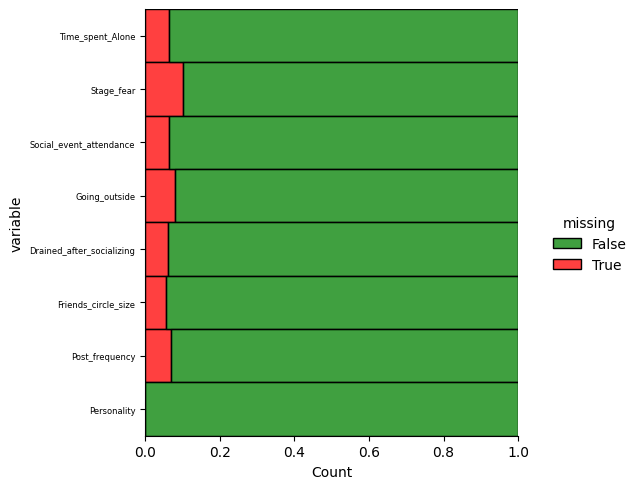

In [ ]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)
plt.savefig('missing.png')

**Observations:**

- semua variabel memiliki missing values `<10%`, oleh karena itu diputuskan untuk mempertahankan variabel

## EDA
##  Hypothesis
---

1. Hubungan `Time_spent_Alone` dengan `Personality`
* **H₁**: Semakin **tinggi** jumlah waktu yang dihabiskan sendirian, semakin besar kemungkinan seseorang memiliki kepribadian **introvert**.

---

2. Hubungan `Stage_fear` dengan `Personality`
* **H₁**: Seseorang yang **memiliki** demam panggung (`Stage_fear` = Yes) lebih cenderung memiliki kepribadian **introvert**.

---

3. Hubungan `Social_event_attendance` dengan `Personality`
* **H₁**: Semakin **rendah** frekuensi kehadiran di acara sosial, semakin besar kemungkinan seseorang memiliki kepribadian **introvert**.

---

4. Hubungan `Going_outside` dengan `Personality`
* **H₁**: Semakin **rendah** frekuensi keluar rumah, semakin besar kemungkinan seseorang memiliki kepribadian **introvert**.

---

5. Hubungan `Drained_after_socializing` dengan `Personality` 🔋
* **H₁**: Seseorang yang **merasa lelah** setelah bersosialisasi (`Drained_after_socializing` = Yes) sangat cenderung memiliki kepribadian **introvert**.

---

6. Hubungan `Friends_circle_size` dengan `Personality` 👥
* **H₁**: Semakin **kecil** ukuran lingkaran pertemanan, semakin besar kemungkinan seseorang memiliki kepribadian **introvert**.

---

7. Hubungan `Post_frequency` dengan `Personality`
* **H₁**: Semakin **rendah** frekuensi posting di media sosial, semakin besar kemungkinan seseorang memiliki kepribadian **introvert**.

### Data Types Information

In [ ]:
for col in train.columns:
    print(f"Unique values in '{col}':")
    print(train[col].unique())
    print("-" * 30)

Unique values in 'Time_spent_Alone':
[ 0.  1.  6.  3.  2.  4. nan  5.  9. 10.  7.  8. 11.]
------------------------------
Unique values in 'Stage_fear':
['No' 'Yes' nan]
------------------------------
Unique values in 'Social_event_attendance':
[ 6.  7.  1.  4.  8.  2.  5. nan  0.  9.  3. 10.]
------------------------------
Unique values in 'Going_outside':
[ 4.  3.  0.  5. nan  1.  6.  2.  7.]
------------------------------
Unique values in 'Drained_after_socializing':
['No' nan 'Yes']
------------------------------
Unique values in 'Friends_circle_size':
[15. 10.  3. 11. 13. nan  4.  0. 14.  5.  9. 12.  8.  2.  1.  6.  7.]
------------------------------
Unique values in 'Post_frequency':
[ 5.  8.  0. nan  3.  4.  2.  9. 10.  6.  7.  1.]
------------------------------
Unique values in 'Personality':
['Extrovert' 'Introvert']
------------------------------


In [ ]:
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

**Change the Some column data type**

Kita mengubah tipe data categorical ke `category`, agar dalam melakukan explorasi dan insight tidak di anggap sebagai data numerical

In [ ]:
train[cat_cols] = train[cat_cols].astype("category")

In [ ]:
print('Data type after correction:\n')
train.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           17334 non-null  float64 
 1   Stage_fear                 16631 non-null  category
 2   Social_event_attendance    17344 non-null  float64 
 3   Going_outside              17058 non-null  float64 
 4   Drained_after_socializing  17375 non-null  category
 5   Friends_circle_size        17470 non-null  float64 
 6   Post_frequency             17260 non-null  float64 
 7   Personality                18524 non-null  category
dtypes: category(3), float64(5)
memory usage: 778.4 KB


### Statistical Summary

In [ ]:
print('The number of numerical features is {}'.format(len(num_cols)))


numerical_summary = train[num_cols].describe().fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

The number of numerical features is 5


In [ ]:
numerical_summary

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


**Observations:**

- Kebanyakan personality adalah ekstrovert sehingga rata-rata waktu yang dihabiskan untuk sendiri cukup sedikit yaitu 3 jam, frekuensi ikut acara cukupu tinggi yaitu 5 kali dalam seminggu, frekuensi pergi keluar 4 kali, circle yang besar yaitu 7 kali dan post adalah 5 kali. data cenderung normal karena mean dan median tidak berbeda signifikan

In [ ]:
personality_counts = train['Personality'].value_counts()
personality_percentages = train['Personality'].value_counts(normalize=True) * 100

print("Jumlah individu berdasarkan kepribadian:")
print(personality_counts)
print("\nPersentase individu berdasarkan kepribadian:")
print(personality_percentages)

Jumlah individu berdasarkan kepribadian:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

Persentase individu berdasarkan kepribadian:
Personality
Extrovert    73.95271
Introvert    26.04729
Name: proportion, dtype: float64


In [ ]:
train[cat_cols].describe()

,Stage_fear,Drained_after_socializing,Personality
count,16631,17375,18524
unique,2,2,2
top,No,No,Extrovert
freq,12609,13313,13699


**Observations:**

- **`Personality` (Variabel Target)**
  * **Ketidakseimbangan Kelas (Class Imbalance):** Ini adalah observasi paling krusial. Dataset ini sangat tidak seimbang, dengan jumlah **Ekstrovert (13.699)** hampir tiga kali lipat lebih banyak daripada **Introvert (4.825)**.
  * **Distribusi:** Proporsi kepribadian adalah sekitar **74% Ekstrovert** dan **26% Introvert**.
  * **Kualitas Data:** Kolom ini tampaknya menjadi referensi utama karena memiliki jumlah data terlengkap (**18.524 entri**) dan tidak memiliki *missing values*.

- **`Drained_after_socializing` (Lelah Setelah Sosialisasi)**
  * **Distribusi Condong ke "No":** Mayoritas responden (**13.313 dari 17.375, atau sekitar 76.6%**) menjawab **'No'**. Ini berarti sebagian besar individu dalam dataset ini tidak merasa energinya terkuras setelah bersosialisasi.
  * **Korelasi dengan Target:** Jawaban 'No' adalah karakteristik kuat dari seorang ekstrovert. Distribusi ini sangat sejalan dengan dominasi kelas 'Extrovert' pada variabel `Personality`.
  * **Kualitas Data:** Terdapat **1.149 *missing values*** pada kolom ini (total 18.524 - 17.375).

- **`Stage_fear` (Demam Panggung)**
  * **Distribusi Condong ke "No":** Serupa dengan variabel sebelumnya, mayoritas responden (**12.609 dari 16.631, atau sekitar 75.8%**) menjawab **'No'**, yang menandakan mereka tidak memiliki demam panggung.
  * **Korelasi dengan Target:** Tidak memiliki demam panggung juga merupakan ciri yang lebih umum pada ekstrovert. Ini sekali lagi memperkuat observasi bahwa dataset ini didominasi oleh profil ekstrovert.
  * **Kualitas Data:** Kolom ini memiliki jumlah *missing values* yang paling signifikan di antara ketiganya, yaitu sebanyak **1.893 entri**.

### **Uni-variate Analysis**

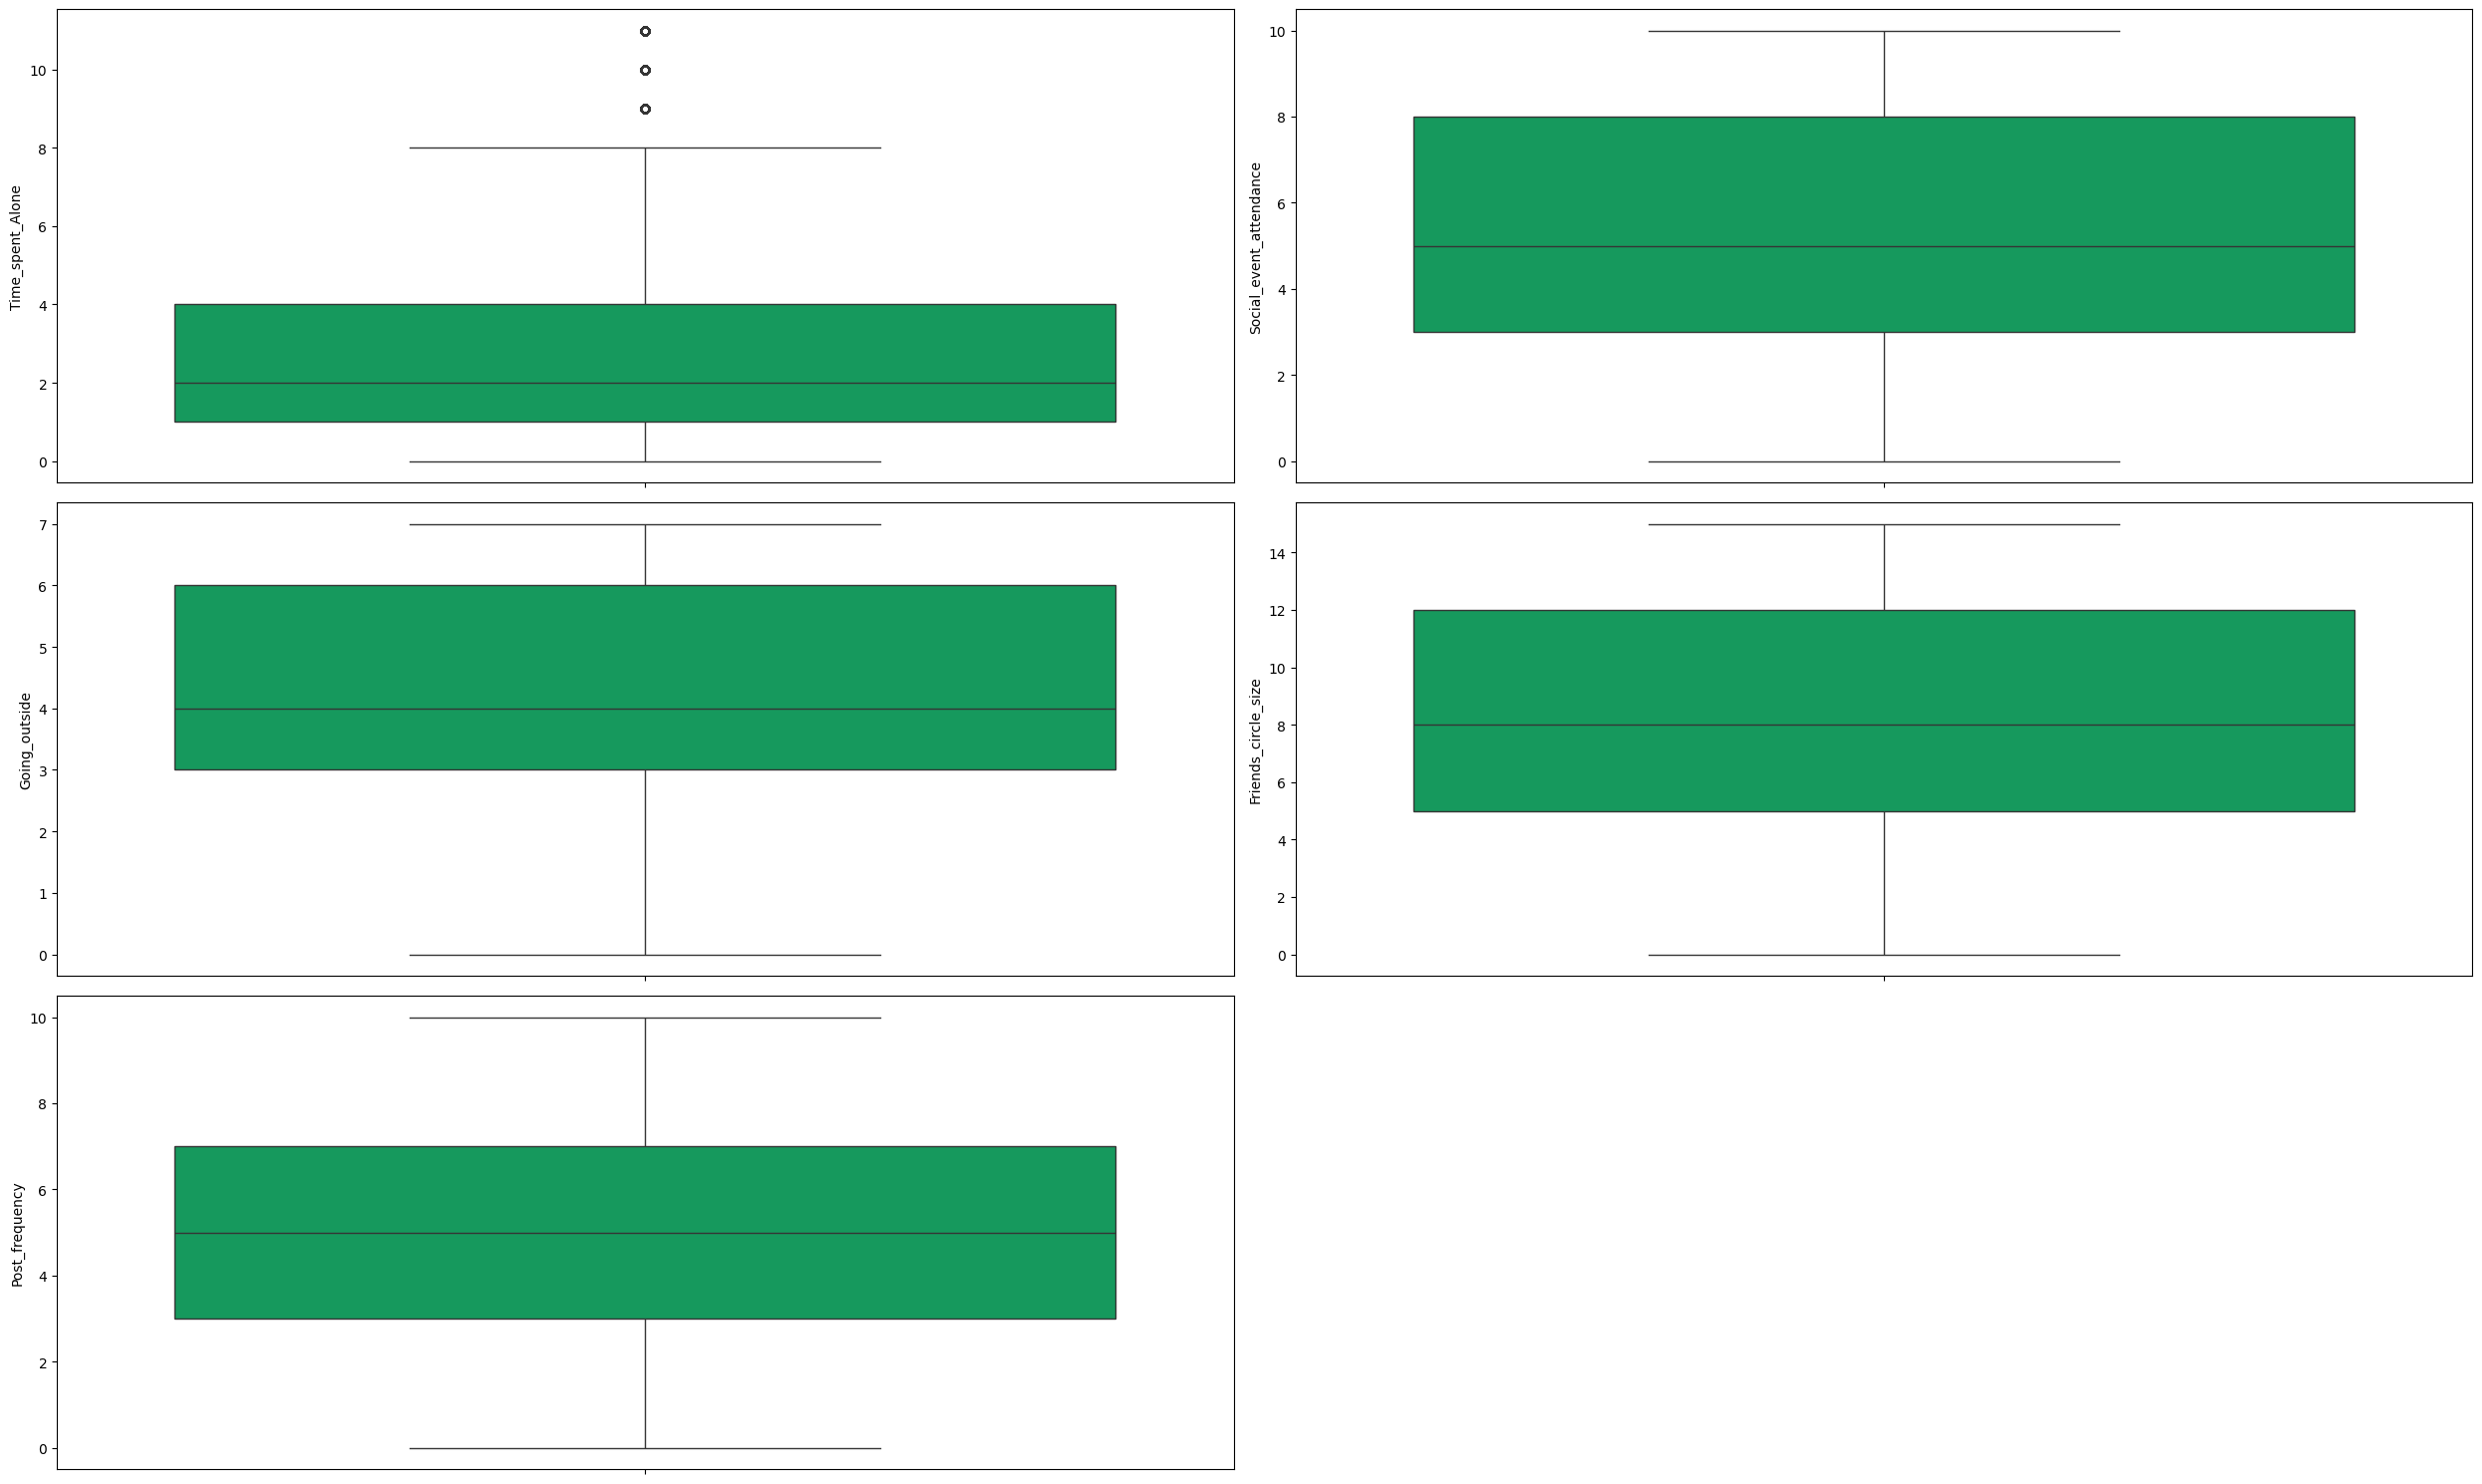

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=train[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()
# plt.savefig('boxplot.png')

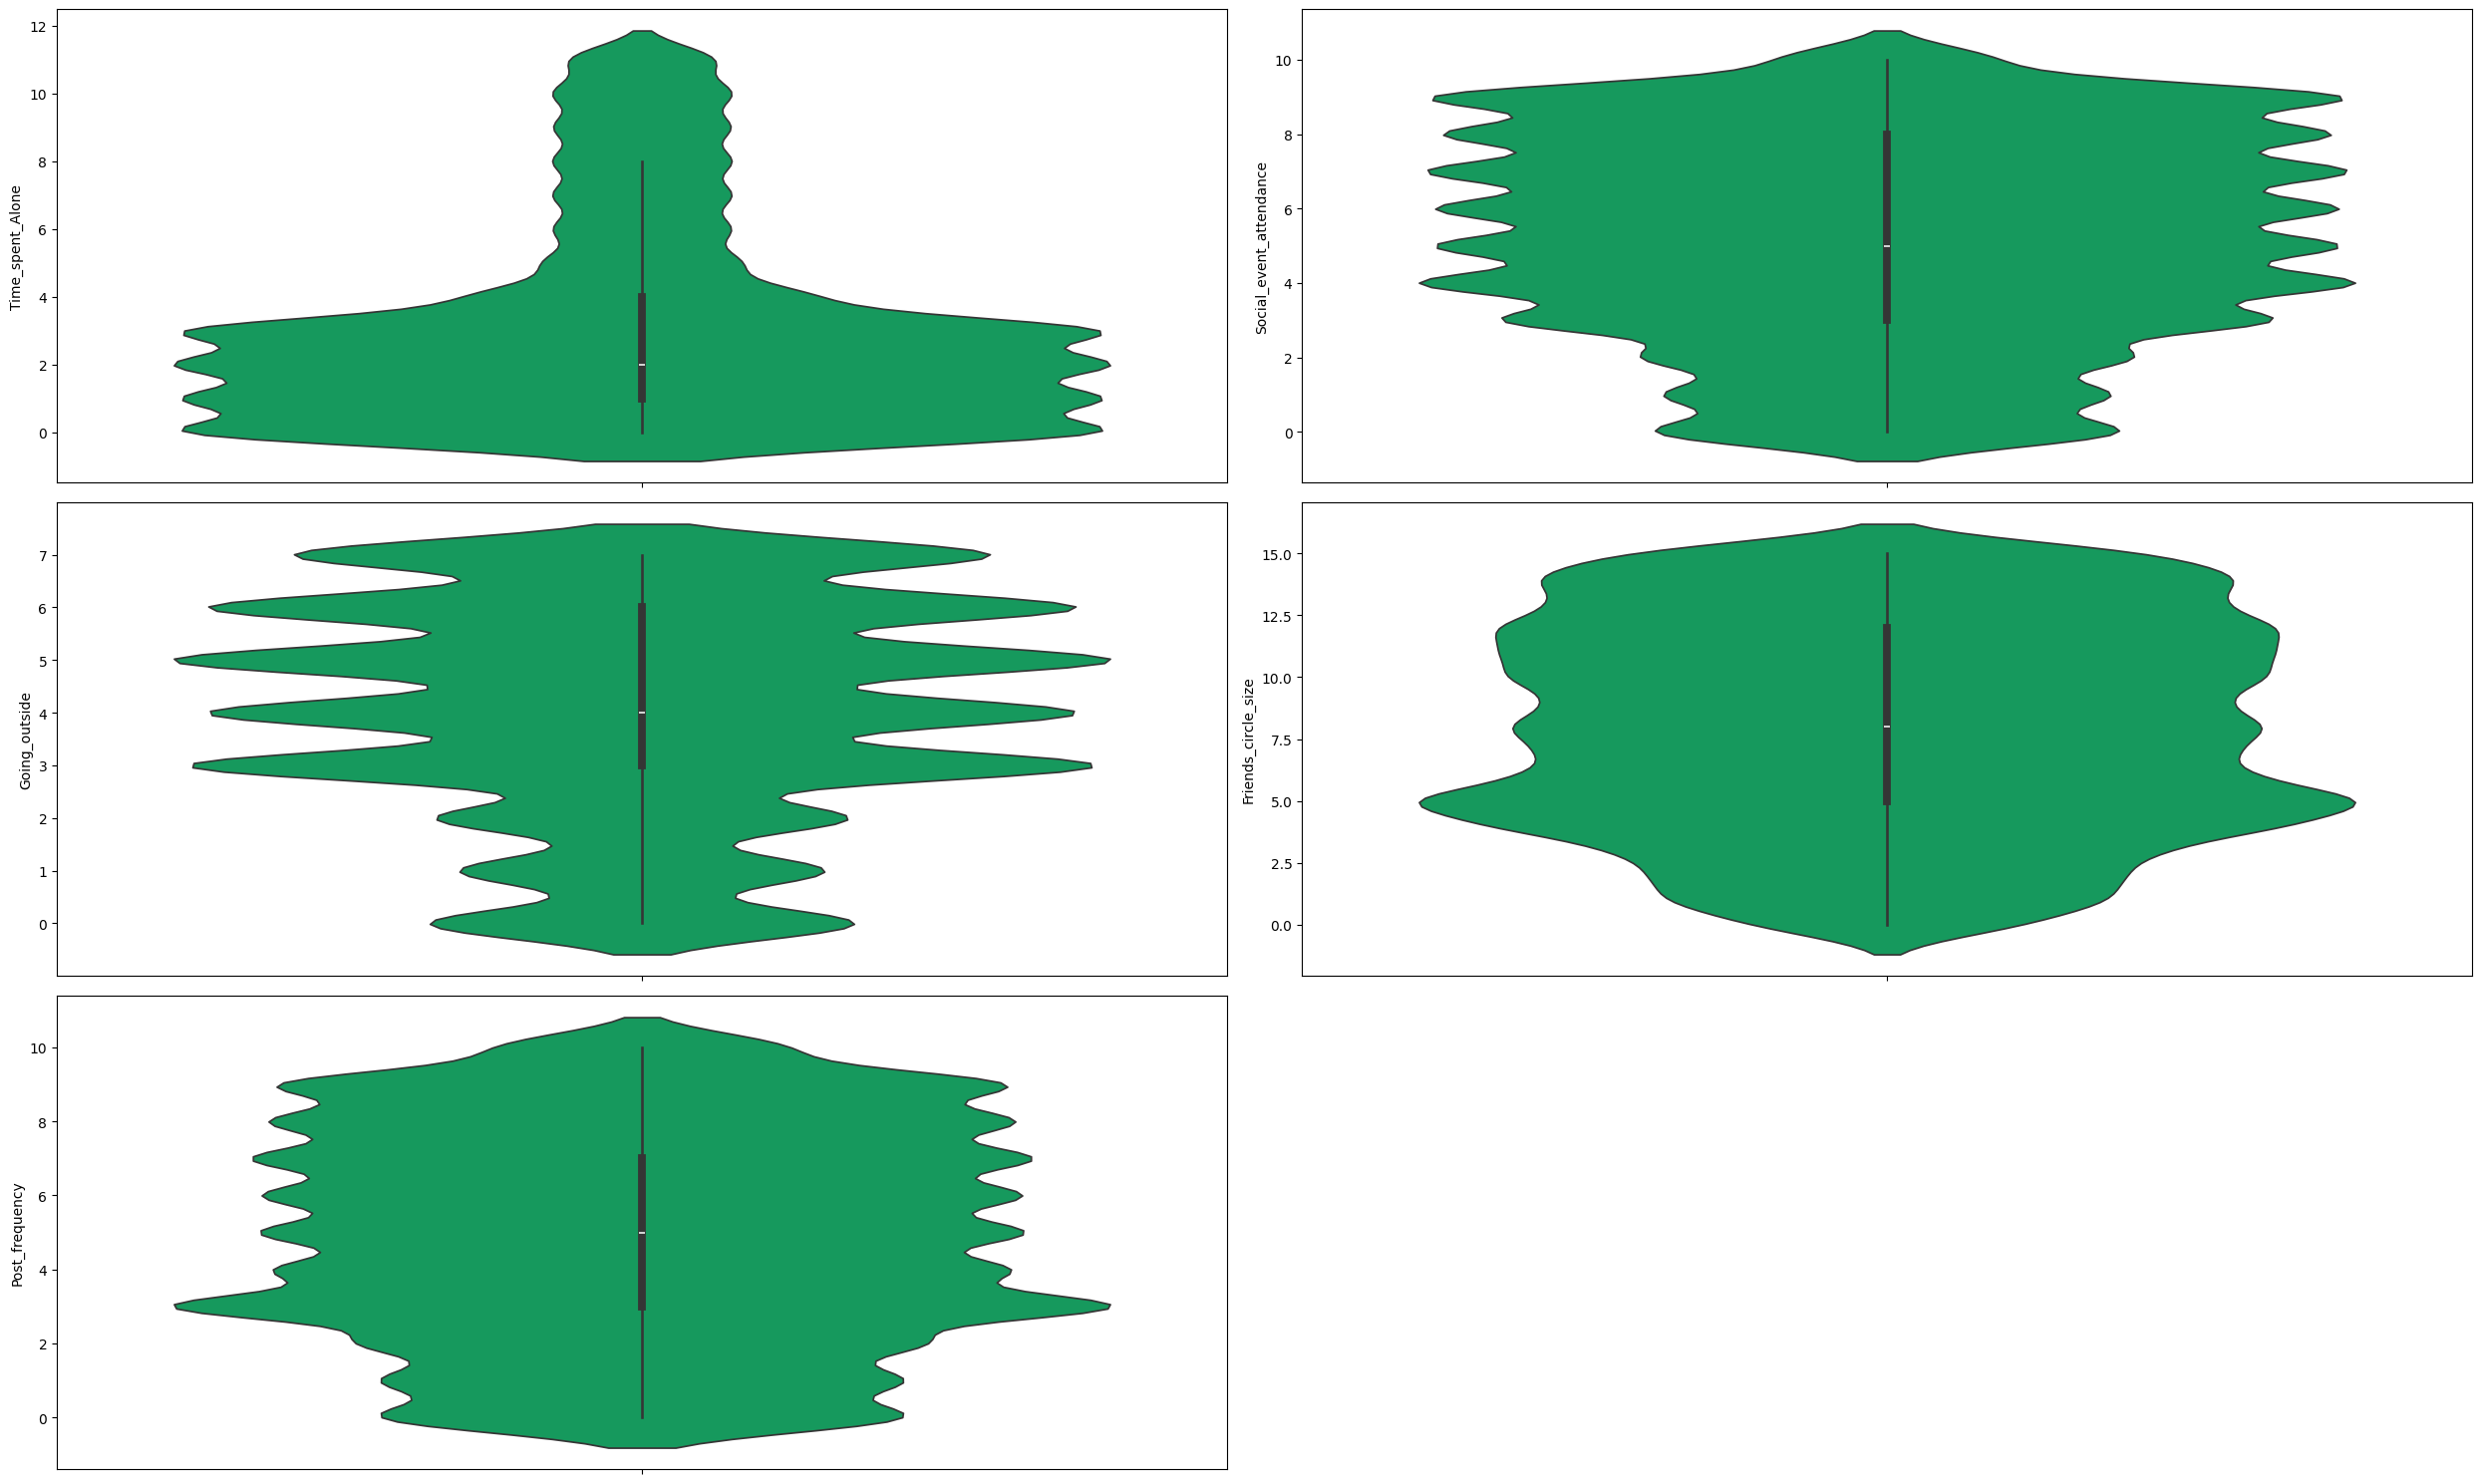

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.violinplot(y=train[num_cols[i]], color='#00af5f',orient='v')
    plt.tight_layout()
# plt.savefig('violinplot.png')

In [ ]:
print(f'Jumlah baris: {len(train)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(train))
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((train[col] >= low_limit) & (train[col] <= high_limit))
    outlier.append(len(train[~filter_outlier]))
    no_outlier.append(len(train[filter_outlier]))
    is_outlier.append(train[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(train[~filtered_entries]))
print("Not Outlier All Data :", len(train[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 18524
Outlier All Data : 6783
Not Outlier All Data : 11741



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Time_spent_Alone,True,-3.5,8.5,2843,15681
1,Social_event_attendance,False,-4.5,15.5,1180,17344
2,Going_outside,False,-1.5,10.5,1466,17058
3,Friends_circle_size,False,-5.5,22.5,1054,17470
4,Post_frequency,False,-3.0,13.0,1264,17260


**Observasi:**

1.  **Outlier per Kolom Individual:**
    * Analisis awal yang menunjukkan bahwa hanya kolom `Time_spent_Alone` yang memiliki *outlier* (sebanyak 2.843) secara individual **tetap benar**.
    * Kolom numerik lainnya (`Social_event_attendance`, `Going_outside`, `Friends_circle_size`, `Post_frequency`) tidak memiliki *outlier* jika dianalisis satu per satu.

2.  **Dampak Gabungan pada Baris Data (Observasi Kunci):**
    * Kode Anda secara cerdas menghitung berapa banyak **baris data** yang "bersih" versus yang "kotor".
    * `Not Outlier All Data`: Angka ini menunjukkan jumlah baris yang **tidak memiliki *outlier* sama sekali di semua kolom numerik**. Ini adalah data "ideal" Anda.
    * `Outlier All Data`: Angka ini menunjukkan jumlah baris yang memiliki **setidaknya satu nilai *outlier* di salah satu kolom numerik**. Angka ini sangat penting karena merepresentasikan jumlah baris yang akan hilang jika Anda memutuskan untuk menghapus semua baris yang mengandung *outlier*.
    * Karena semua *outlier* berasal dari satu kolom (`Time_spent_Alone`), maka dalam kasus ini, `Outlier All Data` akan sama dengan jumlah *outlier* di kolom tersebut, yaitu **2.843 baris**.

#### **Rekomendasi Penanganan Data (Disesuaikan):**

Memahami bahwa 2.843 **baris data** akan terpengaruh memperkuat argumen untuk tidak menghapus data. Menghilangkan hampir 3.000 sampel akan secara signifikan mengurangi kekuatan statistik dan kemampuan generalisasi model Anda.

Oleh karena itu, rekomendasi berikut menjadi lebih relevan:

1.  **Capping (Winsorization) — Rekomendasi Terkuat**
    * **Tindakan**: Atasi *outlier* hanya pada sumbernya. Ganti nilai di kolom `Time_spent_Alone` yang > 8.5 menjadi 8.5.
    * **Keuntungan**: Ini adalah pendekatan "bedah" yang presisi. Anda memperbaiki masalah **tanpa kehilangan satu baris data pun**. Seluruh informasi dari kolom lain dalam 2.843 baris tersebut tetap utuh dan dapat digunakan oleh model.

2.  **Transformasi Data**
    * **Tindakan**: Terapkan transformasi (misalnya, Log atau Akar Kuadrat) pada kolom `Time_spent_Alone`.
    * **Keuntungan**: Mengurangi pengaruh nilai ekstrem sambil mempertahankan variasi data secara keseluruhan. Ini juga merupakan metode non-destruktif yang tidak menghapus data.

3.  **Gunakan Model yang Robust terhadap Outlier**
    * **Tindakan**: Abaikan *outlier* dan langsung gunakan model seperti **Random Forest** atau **Gradient Boosting**.
    * **Keuntungan**: Praktis dan cepat. Model-model ini secara desain dapat menangani nilai-nilai ekstrem dengan memisahkannya di dalam struktur pohon keputusan mereka, sehingga dampaknya pada hasil akhir minimal.

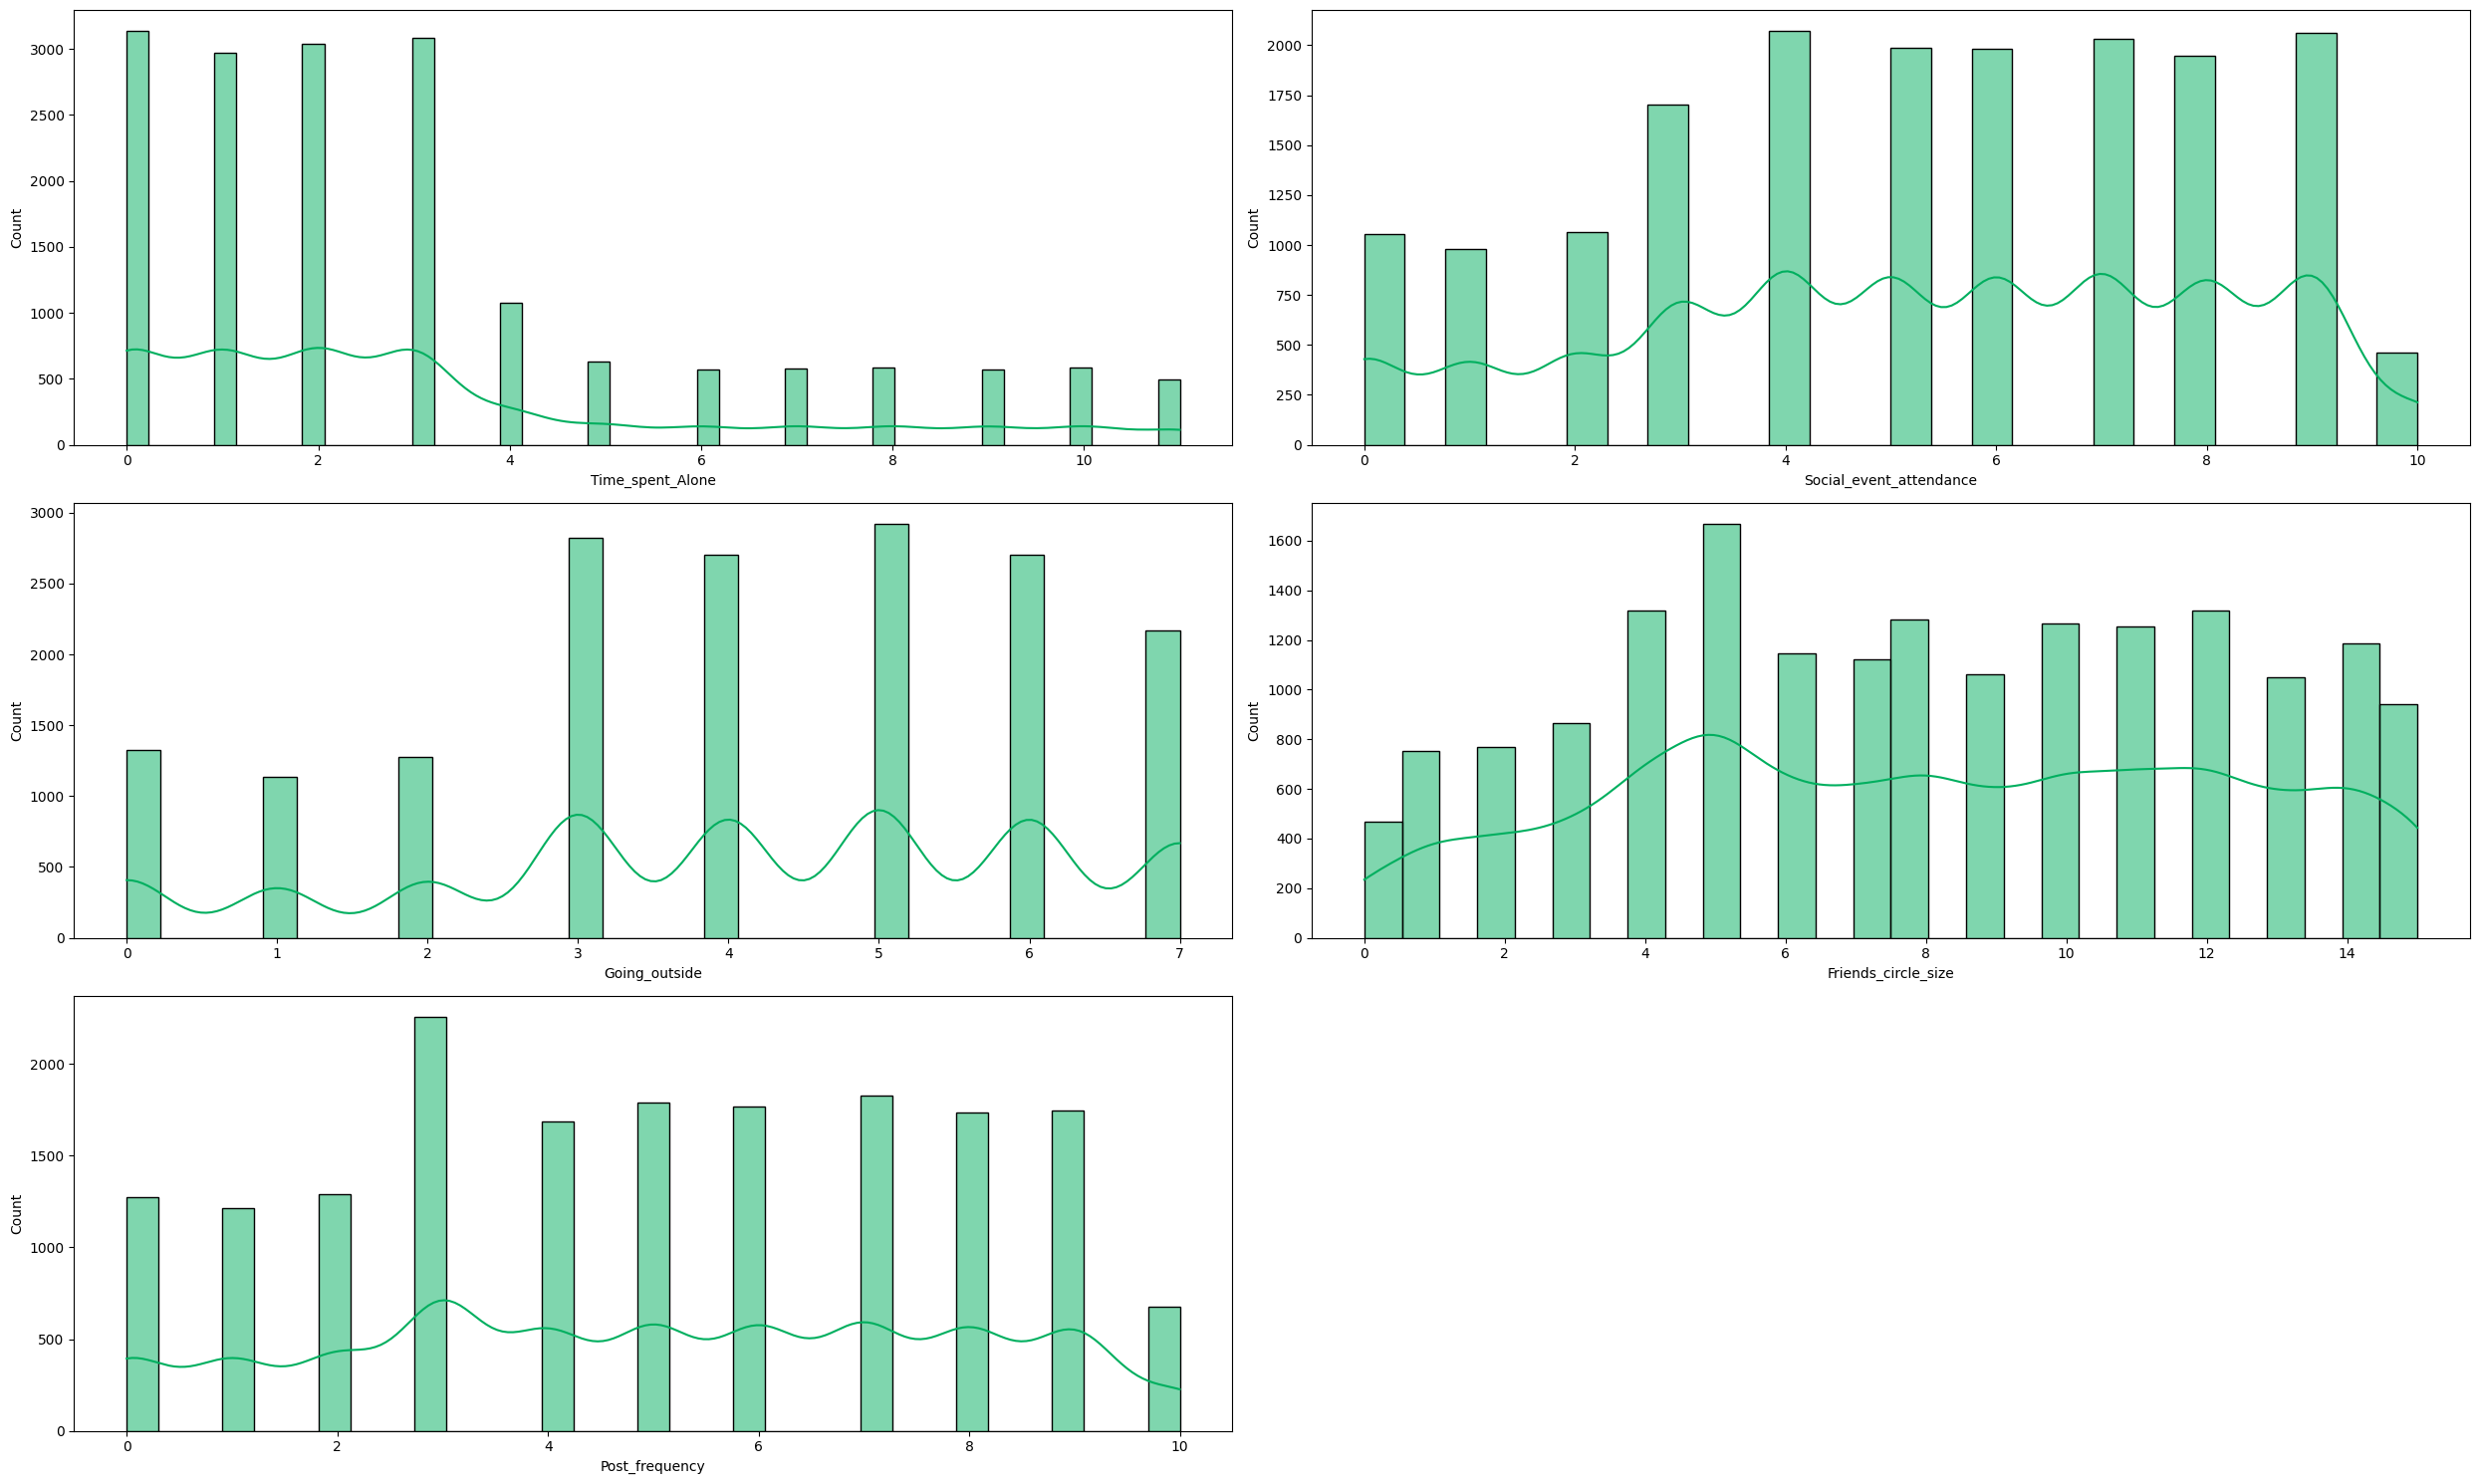

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(train[num_cols[i]], color='#00af5f', kde=True)
    plt.tight_layout()
# plt.savefig('histplot.png')

In [ ]:
from scipy.stats import skew, kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = train[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

# dist.loc[dist["Column Name"].isin(["jumlah_anak_balita", "jumlah_anak_remaja"]), "Type of Distribution"] = "Bimodal Distribution"
dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Time_spent_Alone,1.134,0.354,Highly Positively Skewed
1,Social_event_attendance,-0.229,-0.925,Moderately Normal Distribution (Symmetric)
2,Going_outside,-0.367,-0.781,Moderately Normal Distribution (Symmetric)
3,Friends_circle_size,-0.052,-1.080,Normal Distribution (Symmetric)
4,Post_frequency,-0.059,-1.071,Normal Distribution (Symmetric)


**Observations:**

1.  ***Distribusi Normal***:
    * `Friends_circle_size`: Distribusi Normal (Sangat Simetris)
    * `Post_frequency`: Distribusi Normal (Sangat Simetris)
    * `Social_event_attendance`: Distribusi Moderat Normal (Cukup Simetris)
    * `Going_outside`: Distribusi Moderat Normal (Cukup Simetris)

2.  ***Distribusi Positif Skewed***:
    * `Time_spent_Alone`: Sangat Positif Skewed

#### Rekomendasi pada Tahap Data Pre-Processing:
Untuk variabel yang mengalami Distribusi Positif Skewed (Time_spent_Alone), disarankan untuk melakukan transformasi data. Tujuannya adalah untuk membuat distribusi data menjadi lebih normal sehingga dapat meningkatkan performa beberapa model machine learning (terutama model linear).

Tindakan yang Disarankan: Terapkan Log Transformation atau Square Root Transformation pada kolom Time_spent_Alone.

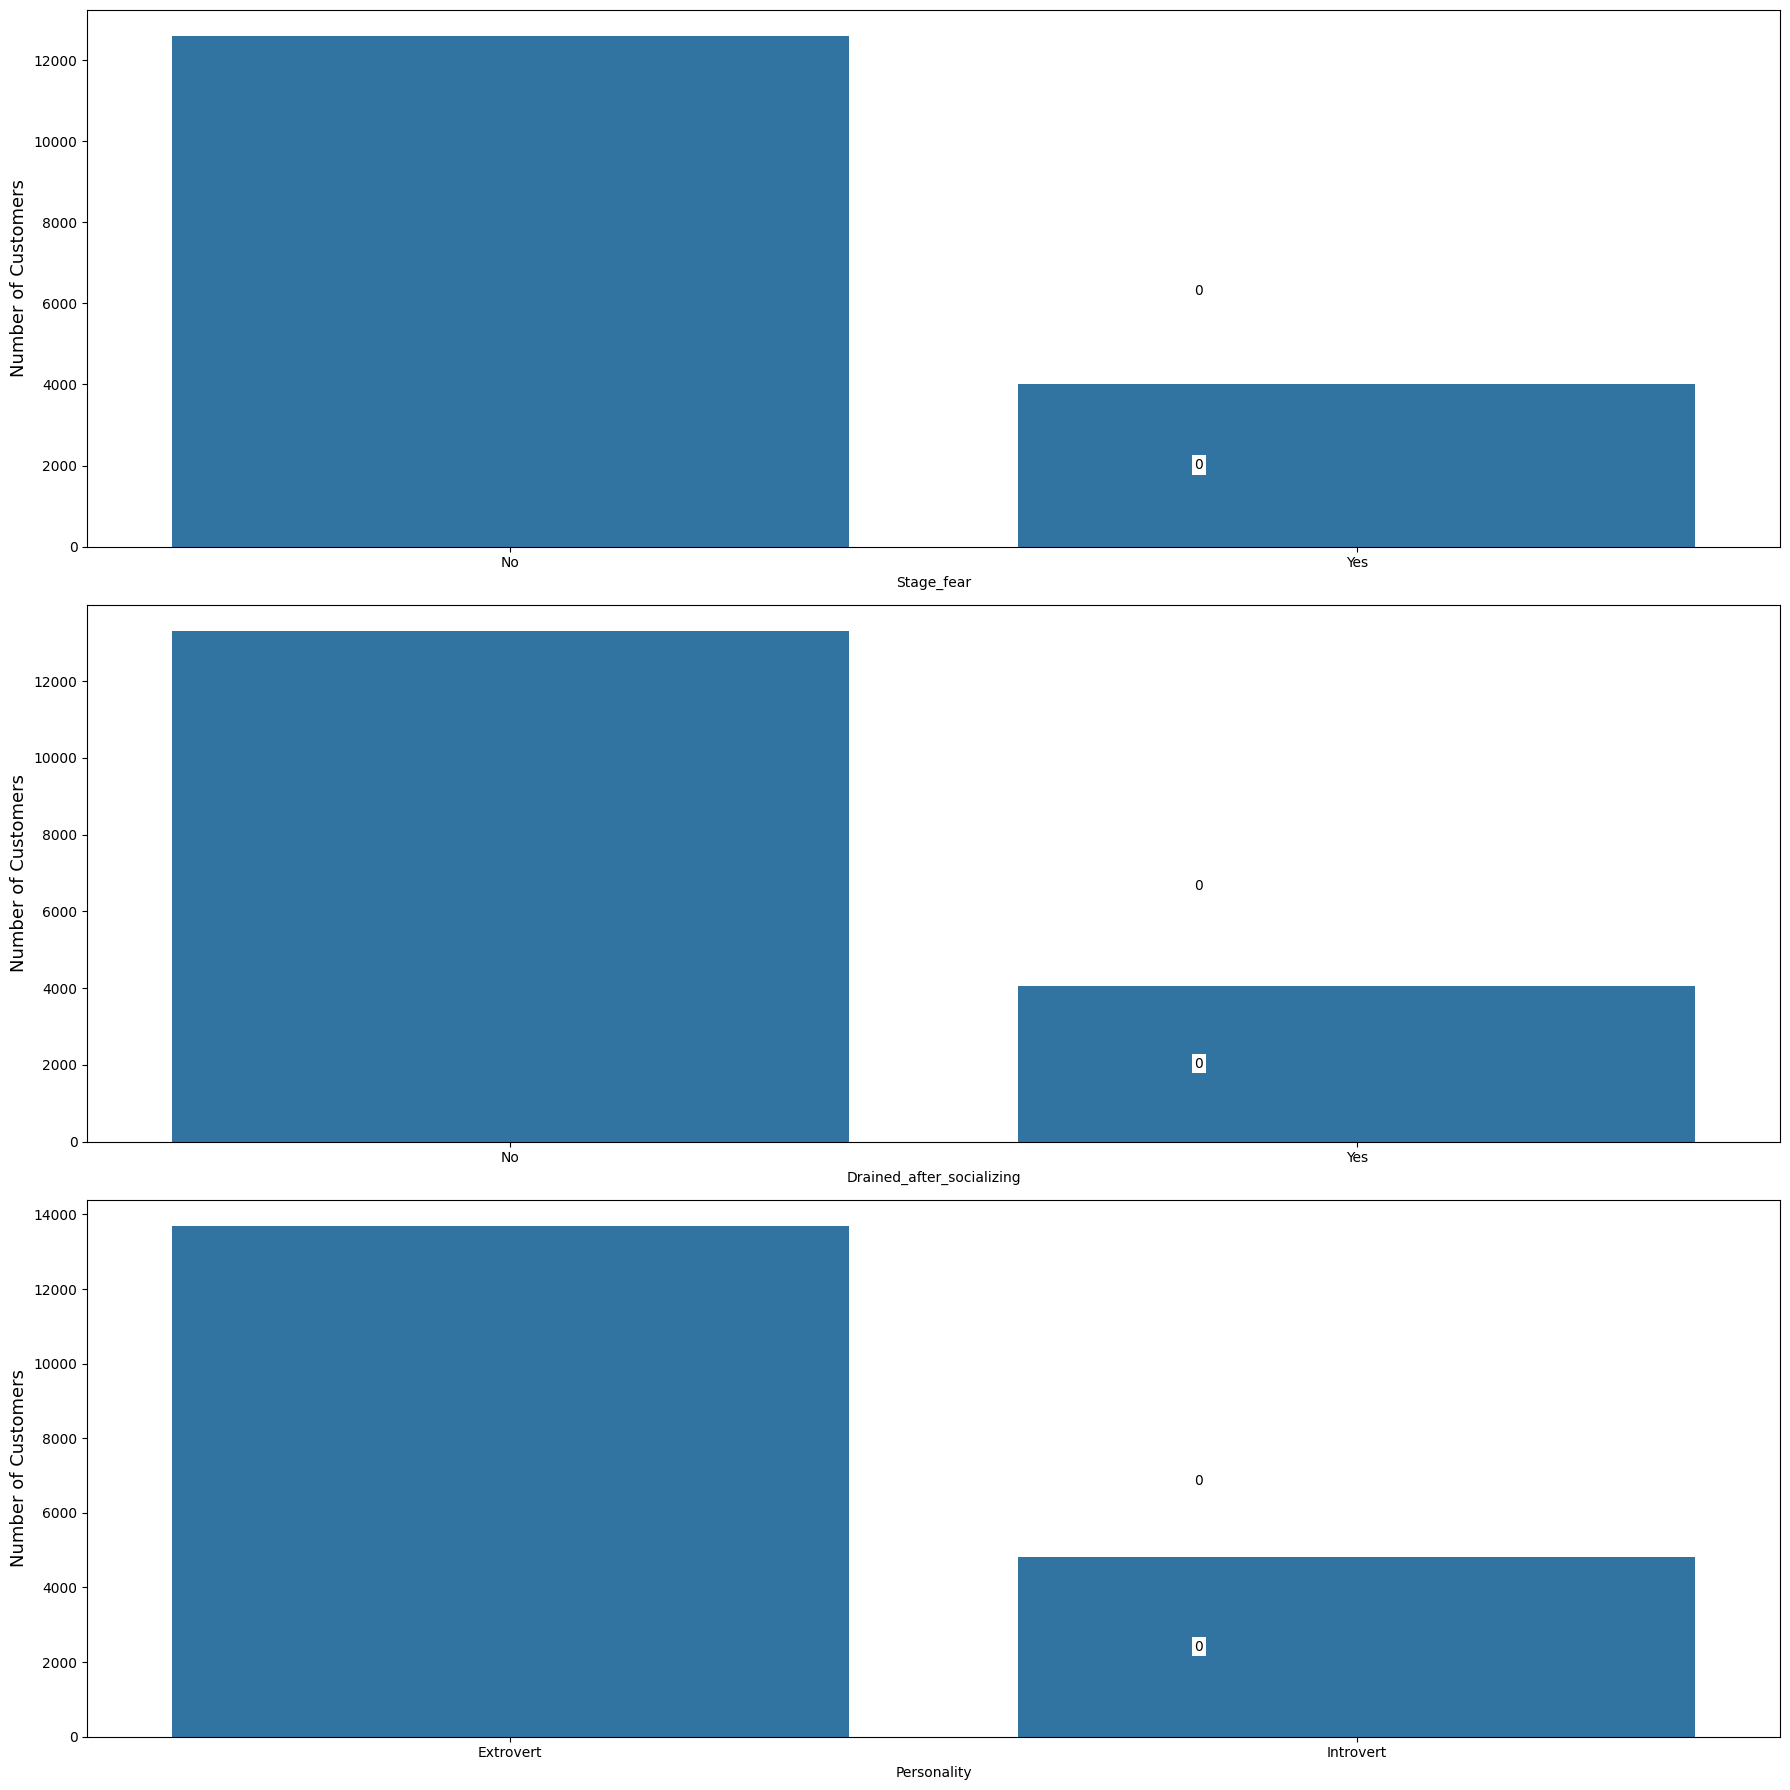

In [ ]:
cat = cat_cols.copy()

n=3
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=train[cat[i]], orient='h')
    for j in bar.patches:
        bar.annotate(int(j.get_width()),
                xy=(j.get_width(), j.get_y() + j.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center',
                bbox=dict(facecolor='white', edgecolor="None", pad=2))

    sns.color_palette("YlOrBr")
    plt.xticks(rotation=0)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()
# plt.savefig('countplot.png')

### **Multivariate Analysis**

#### **Heatmap Correlation**

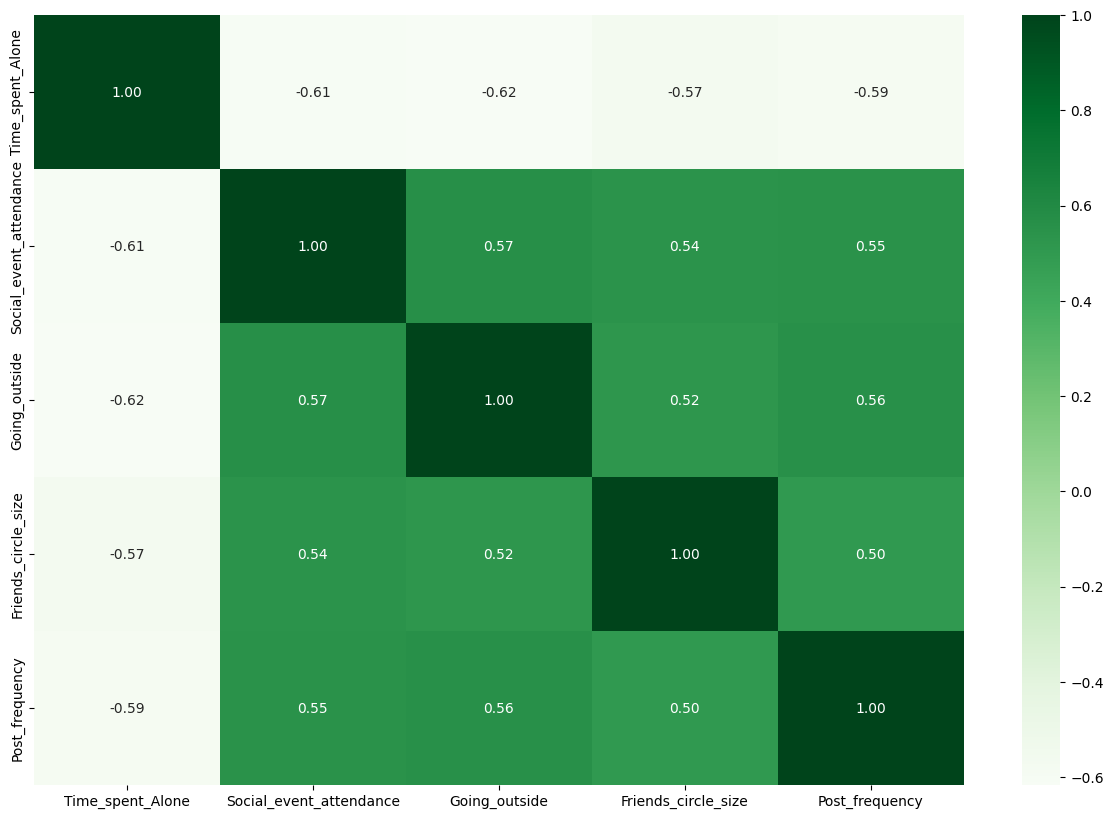

In [ ]:
cat = train[cat_cols].dropna().astype('category')
dfhm = pd.concat([train[num_cols].dropna(), cat], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(dfhm.corr(numeric_only=True), cmap='Greens', annot=True, fmt='.2f')
plt.savefig('heatmap.png')

**Checking Correlation with Target (Response)**

In [ ]:
# Map 'Extrovert' to 1 and 'Introvert' to 0
personality_coded = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

corr = dfhm[num_cols].corrwith(personality_coded)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

,index,corr value,Corr Type
0,Time_spent_Alone,0.756525,Negatif
1,Social_event_attendance,0.680270,Positif
2,Going_outside,0.680013,Positif
3,Post_frequency,0.655399,Positif
4,Friends_circle_size,0.626190,Positif


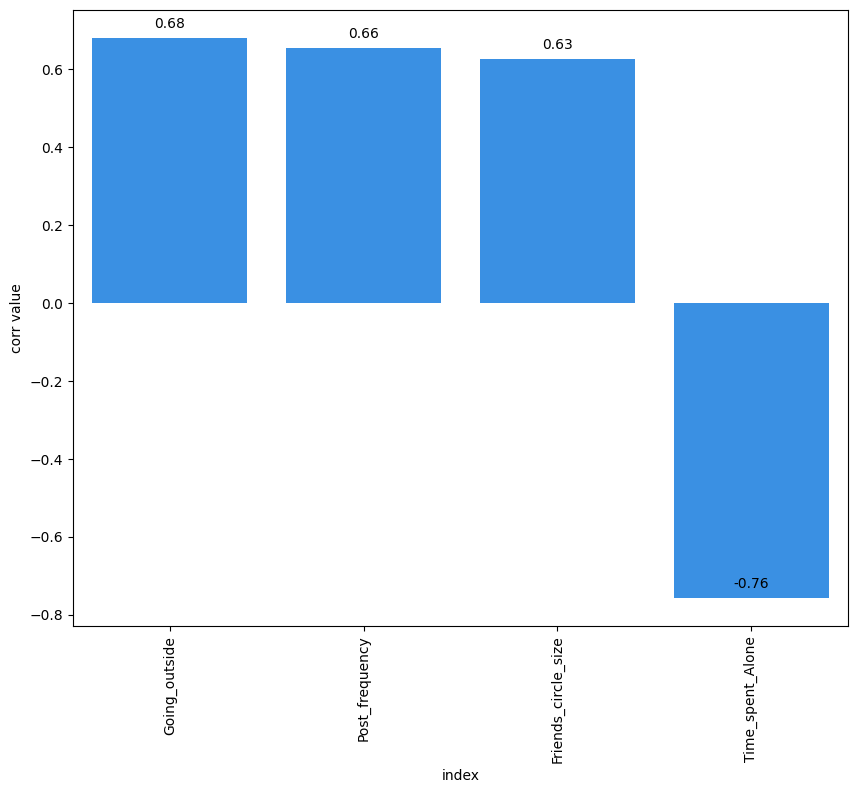

<Figure size 640x480 with 0 Axes>

In [ ]:
personality_coded = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

corr = dfhm[num_cols].corrwith(personality_coded)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()
plt.savefig('corr value.png')

#### **Pairplot**

<Figure size 1500x1500 with 0 Axes>

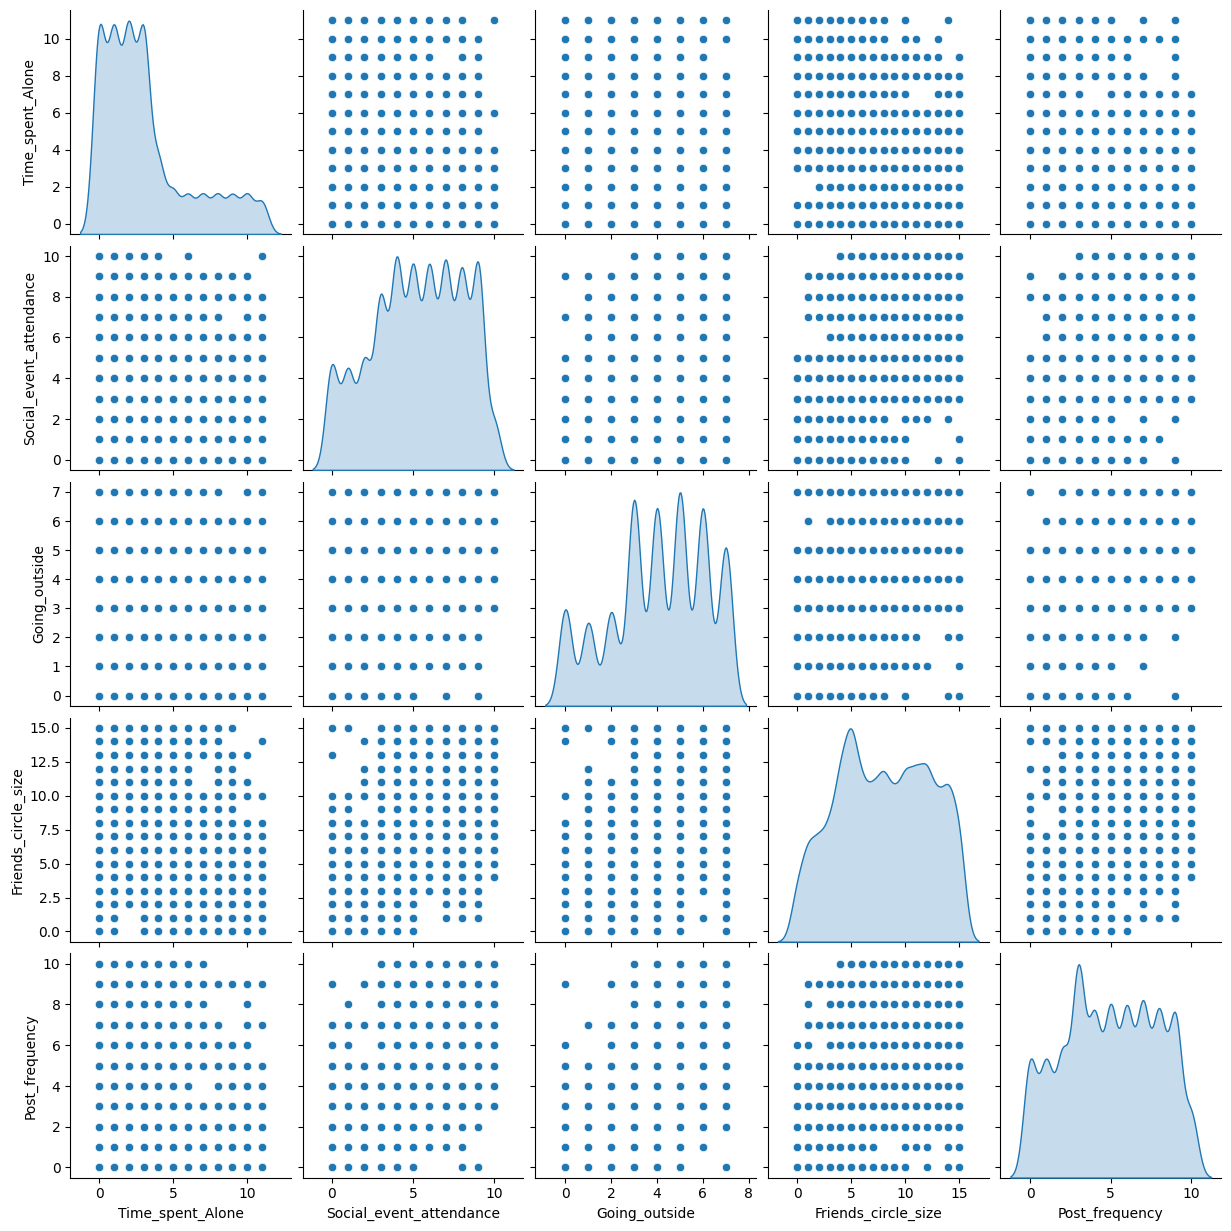

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(train[num_cols], diag_kind='kde')
plt.savefig('paiplot.png')

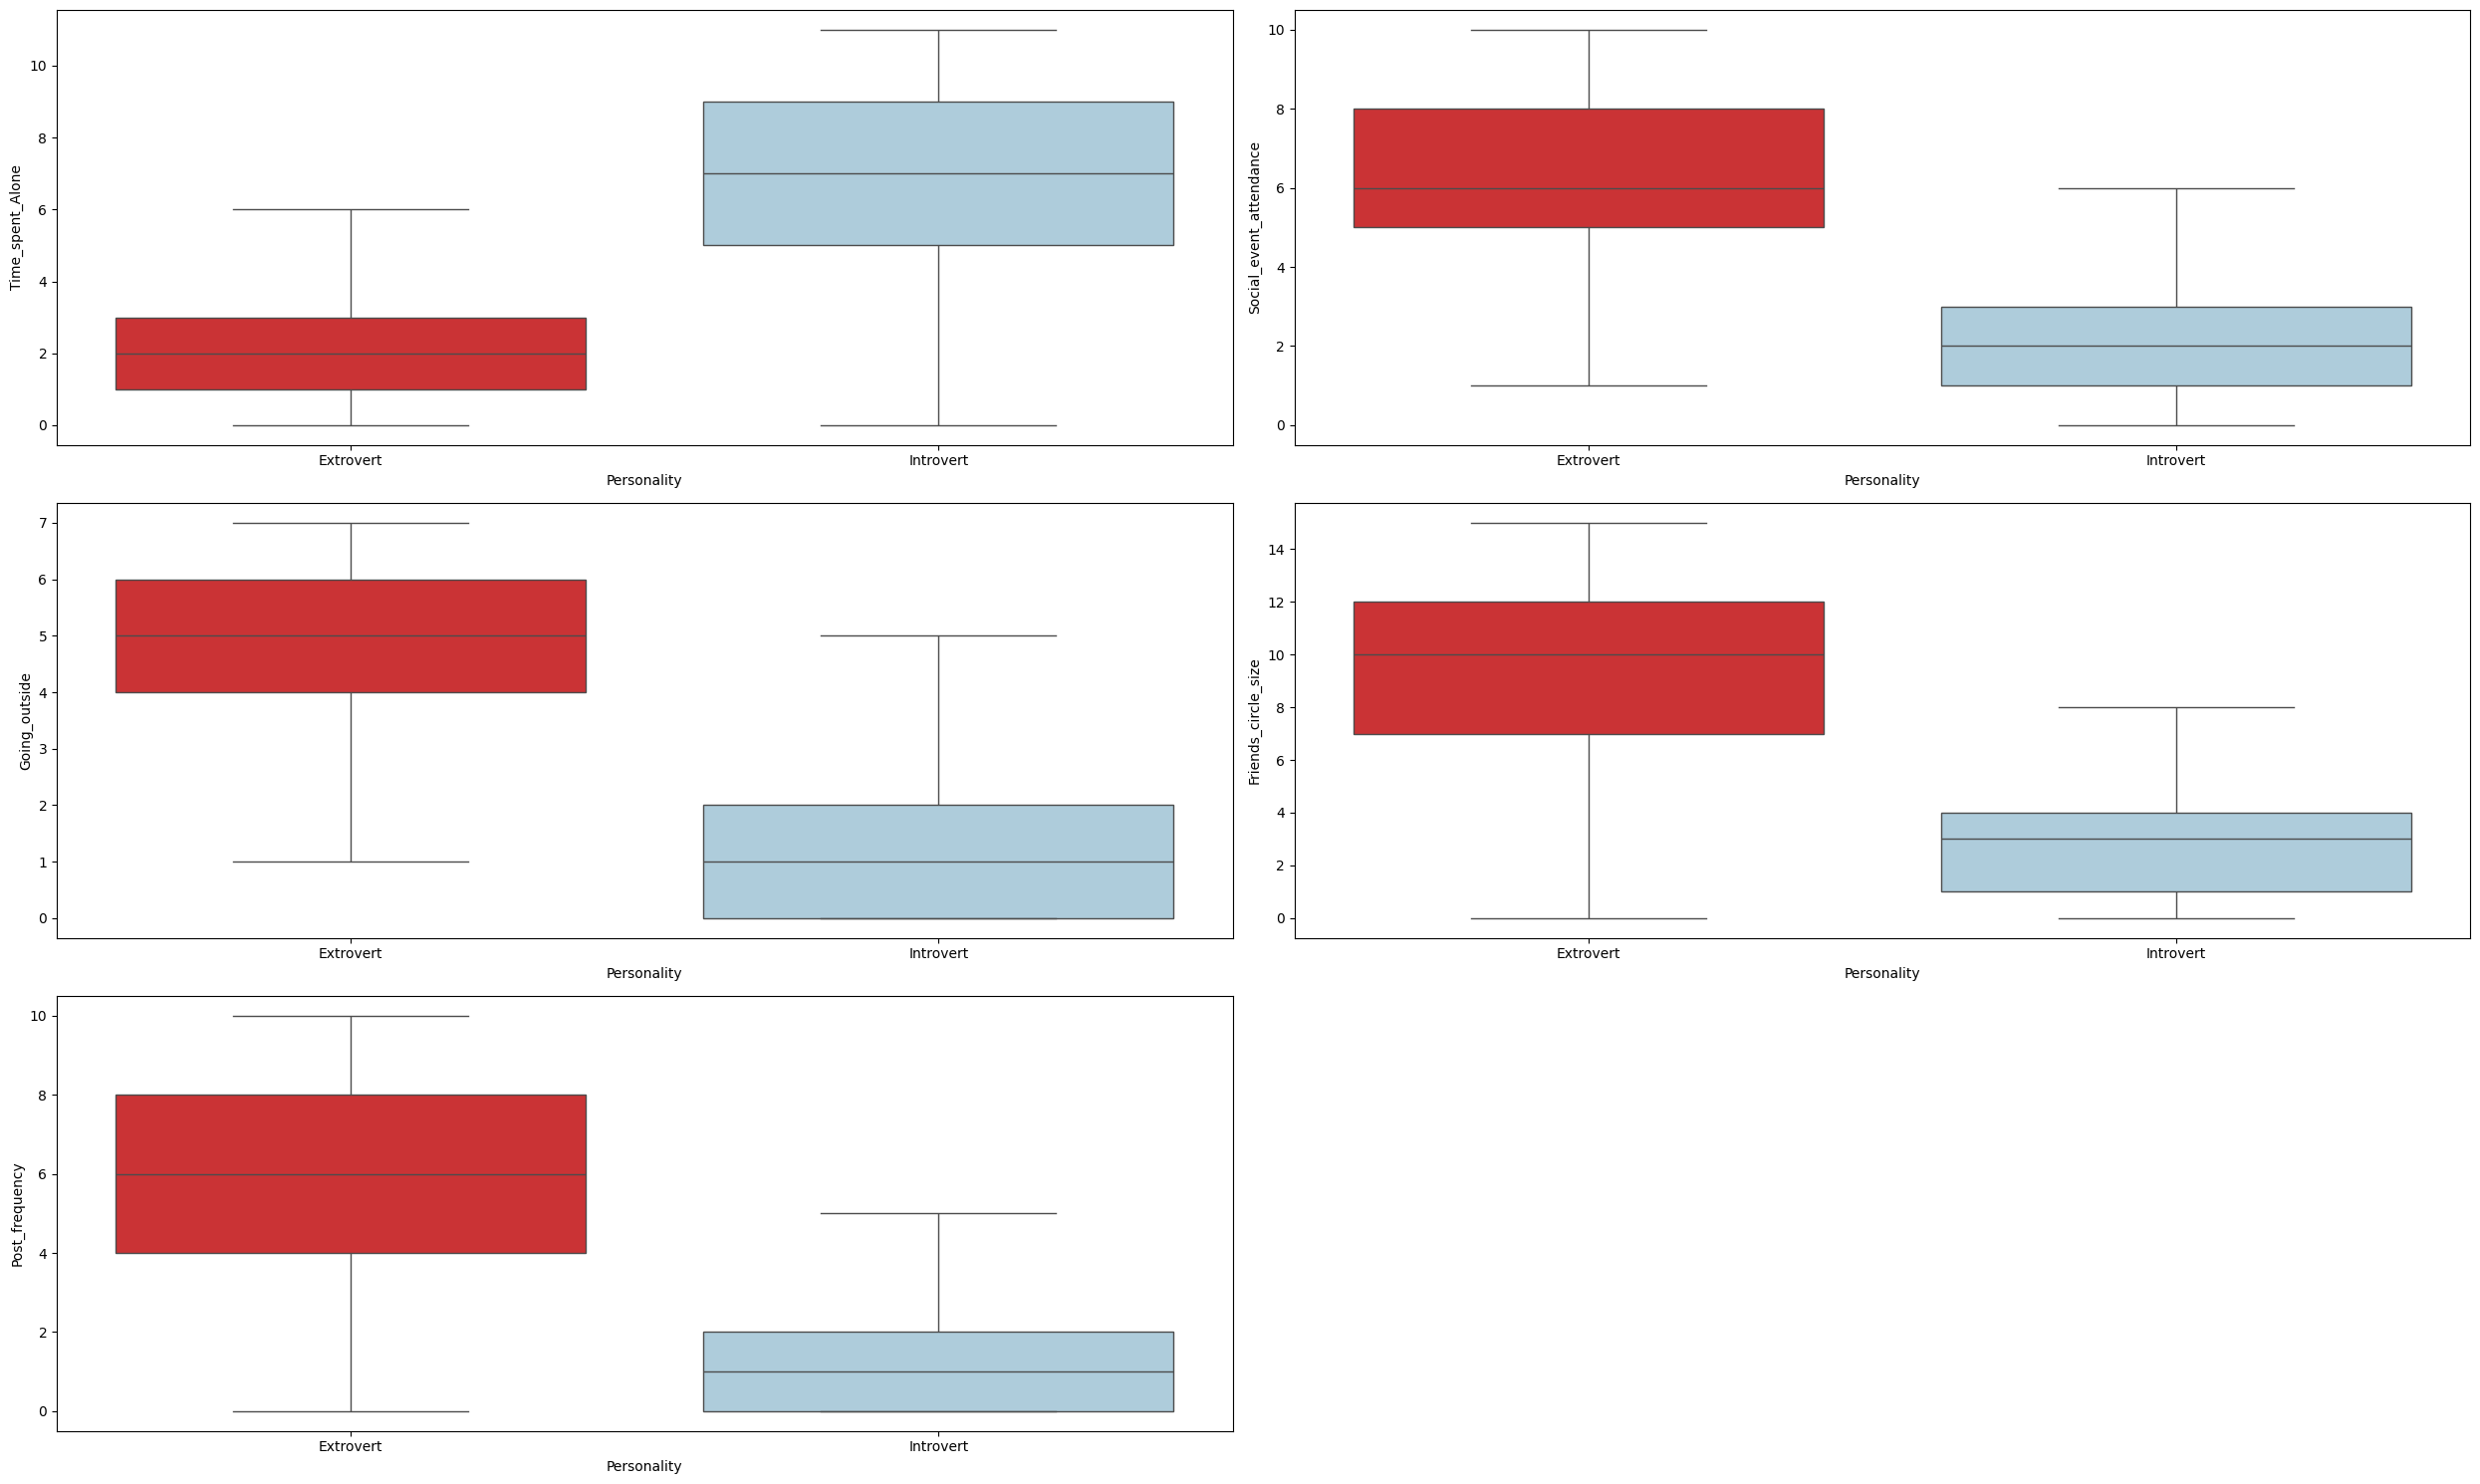

In [ ]:
plt.figure(figsize=(25, 15))
colors=["#e31a1c", "#a6cee3"]
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(x=train["Personality"], y=train[num_cols[i]], orient='v', palette=colors, showfliers=False)
    plt.tight_layout()

## imputation

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def impute_numerical_data_with_lightgbm(df, column_to_impute, categorical_columns):
    # Remove 'Personality' from categorical columns if it's the column to impute
    if column_to_impute in categorical_columns:
        categorical_columns = [col for col in categorical_columns if col != column_to_impute]

    df_with_missing = df[df[column_to_impute].isna()].copy()
    df_without_missing = df[~df[column_to_impute].isna()].copy()

    X = df_without_missing.drop(columns=[column_to_impute])
    y = df_without_missing[column_to_impute]

    for col in categorical_columns:
        if col in X.columns:
            X[col] = X[col].astype('category')
        if col in df_with_missing.columns:
            df_with_missing.loc[:, col] = df_with_missing[col].astype('category')


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = lgb.LGBMRegressor(
        n_estimators=100,
        learning_rate=0.1,
        num_leaves=31,
        random_state=0
    )
    # Ensure categorical features passed to model.fit are present in X_train
    model.fit(X_train, y_train, categorical_feature=[col for col in categorical_columns if col in X_train.columns])

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    imputed_values = model.predict(df_with_missing.drop(columns=[column_to_impute]))
    # Impute based on the original DataFrame index
    df.loc[df_with_missing.index, column_to_impute] = imputed_values

    return df, mae


categorical_columns = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Only numerical columns can be imputed using this function
numerical_columns_to_impute = [
    'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
    'Friends_circle_size', 'Post_frequency'
]

imputation_results = {}
current_train_df = train.copy() # Work on a copy to avoid modifying the original in place repeatedly

for column in numerical_columns_to_impute:
    if column in current_train_df.columns:
        # Ensure categorical_columns passed to the function are relevant to the current imputation
        current_cat_cols = [col for col in categorical_columns if col != column] # Exclude the column being imputed
        current_train_df, mae = impute_numerical_data_with_lightgbm(current_train_df, column, current_cat_cols)
        imputation_results[column] = mae
    else:
        print(f"The column '{column}' was not found in the DataFrame.")
        imputation_results[column] = None

print("MAE for each imputed numerical column:")
print(imputation_results)

# Now, handle categorical columns imputation separately if needed
# The provided function is for numerical imputation

# For categorical imputation, you would typically use a classification model
# as the target variable is categorical.

# For now, let's display the head of the DataFrame with imputed numerical values
print("\nDataFrame head after numerical imputation:")
display(current_train_df.head())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 13867, number of used features: 7
[LightGBM] [Info] Start training from score 3.127281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 302
[LightGBM] [Info] Number of data points in the train set: 13875, number of used features: 7
[LightGBM] [Info] Start training from score 5.277838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 1364

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.000000,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.000000,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.000000,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.000000,Extrovert
4,1.0,No,4.0,4.0,No,13.0,6.379805,Extrovert


In [ ]:
current_train_df.isna().sum()

,0
Time_spent_Alone,0
Stage_fear,1893
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1149
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

def impute_categorical_data_with_lightgbm(df, column_to_impute, numerical_columns, categorical_columns):
    # The column to impute should be in the categorical columns list passed to the function
    if column_to_impute not in categorical_columns:
        print(f"Error: Column '{column_to_impute}' is not in the specified categorical columns list.")
        return df, None # Return original df and no f1 score

    df_with_missing = df[df[column_to_impute].isna()].copy()
    df_without_missing = df[~df[column_to_impute].isna()].copy()

    # Features for the model: all other columns except the one being imputed
    X = df_without_missing.drop(columns=[column_to_impute])
    y = df_without_missing[column_to_impute]

    # Convert categorical features to 'category' dtype for LightGBM
    current_categorical_features = [col for col in categorical_columns if col != column_to_impute and col in X.columns]
    for col in current_categorical_features:
        X[col] = X[col].astype('category')
    for col in current_categorical_features: # Apply to the missing part as well
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype('category')

    # Ensure numerical columns are included and are not of 'category' dtype
    current_numerical_features = [col for col in numerical_columns if col in X.columns]
    for col in current_numerical_features:
         if col in X.columns:
            X[col] = X[col].astype(float) # Ensure numerical dtype
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype(float) # Ensure numerical dtype


    # Split data for evaluation (optional but good practice)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        num_leaves=31,
        random_state=0,
        class_weight='balanced', # Useful for imbalanced classes
        verbose=-1 # Suppress verbose output
    )

    # Identify categorical feature indices for LightGBM
    categorical_feature_indices = [X_train.columns.get_loc(c) for c in current_categorical_features if c in X_train.columns]


    model.fit(X_train, y_train,
              categorical_feature=categorical_feature_indices,
              )

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Use average='macro' for f1_score with multiple classes, or 'binary' for 2 classes
    # Assuming it's a binary classification problem for the missing values
    f1_metric = f1_score(y_test, y_pred, average='binary' if len(y.unique()) == 2 else 'macro', pos_label='Yes' if len(y.unique()) == 2 else None)


    # Predict missing values
    imputed_values = model.predict(df_with_missing.drop(columns=[column_to_impute]))

    # Impute based on the original DataFrame index
    df.loc[df_with_missing.index, column_to_impute] = imputed_values

    return df, f1_metric

# Define the numerical and categorical columns based on your dataset
numerical_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing', 'Personality'] # Include Personality as a feature

# Identify categorical columns with missing values
categorical_columns_to_impute = [col for col in categorical_columns if current_train_df[col].isna().any()]

imputation_results_cat = {}
# Use the DataFrame after numerical imputation
current_train_df_imputed_cat = current_train_df.copy()

for column in categorical_columns_to_impute:
    if column in current_train_df_imputed_cat.columns:
        # Pass the full categorical_columns list to the function
        current_train_df_imputed_cat, f1_metric = impute_categorical_data_with_lightgbm(
            current_train_df_imputed_cat,
            column,
            numerical_columns,
            categorical_columns # Pass the full list here
        )
        imputation_results_cat[column] = f1_metric
    else:
        print(f"The categorical column '{column}' was not found in the DataFrame.")
        imputation_results_cat[column] = None

print("F1 Score for each imputed categorical column:")
print(imputation_results_cat)

# Display the head of the DataFrame after categorical imputation
print("\nDataFrame head after categorical imputation:")
display(current_train_df_imputed_cat.head())

# Verify if missing values are imputed
print("\nMissing values after categorical imputation:")
print(current_train_df_imputed_cat.isna().sum())

F1 Score for each imputed categorical column:
{'Stage_fear': 0.9961439588688946, 'Drained_after_socializing': 0.9951573849878934}

DataFrame head after categorical imputation:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.000000,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.000000,Extrovert
2,6.0,Yes,1.0,0.0,Yes,3.0,0.000000,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.000000,Extrovert
4,1.0,No,4.0,4.0,No,13.0,6.379805,Extrovert



Missing values after categorical imputation:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [ ]:
df=current_train_df_imputed_cat.copy()
df.to_csv('imputed_df.csv')

In [ ]:
# !pip install pycaret

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.classification import *

target_map = {'Introvert': 0, 'Extrovert': 1}


df['Personality'] = df['Personality'].map(target_map)


s = setup(df, target = 'Personality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Personality
2,Target type,Binary
3,Original data shape,"(18524, 8)"
4,Transformed data shape,"(18524, 8)"
5,Transformed train set shape,"(12966, 8)"
6,Transformed test set shape,"(5558, 8)"
7,Numeric features,5
8,Categorical features,2
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9690,0.9704,0.9805,0.9777,0.9791,0.9193,0.9194,3.2040
lr,Logistic Regression,0.9688,0.9622,0.9807,0.9773,0.9790,0.9189,0.9190,0.9310
ridge,Ridge Classifier,0.9687,0.9623,0.9807,0.9771,0.9789,0.9184,0.9185,0.0810
ada,Ada Boost Classifier,0.9687,0.9702,0.9807,0.9771,0.9789,0.9184,0.9185,0.3290
lda,Linear Discriminant Analysis,0.9687,0.9624,0.9807,0.9771,0.9789,0.9184,0.9185,0.1380
svm,SVM - Linear Kernel,0.9686,0.9586,0.9809,0.9768,0.9788,0.9182,0.9183,0.1560
nb,Naive Bayes,0.9683,0.9593,0.9797,0.9775,0.9786,0.9176,0.9177,0.0870
gbc,Gradient Boosting Classifier,0.9683,0.9724,0.9804,0.9768,0.9786,0.9175,0.9176,0.7380
knn,K Neighbors Classifier,0.9682,0.9594,0.9803,0.9768,0.9786,0.9173,0.9174,0.1880
xgboost,Extreme Gradient Boosting,0.9682,0.9701,0.9805,0.9766,0.9786,0.9172,0.9174,0.1790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

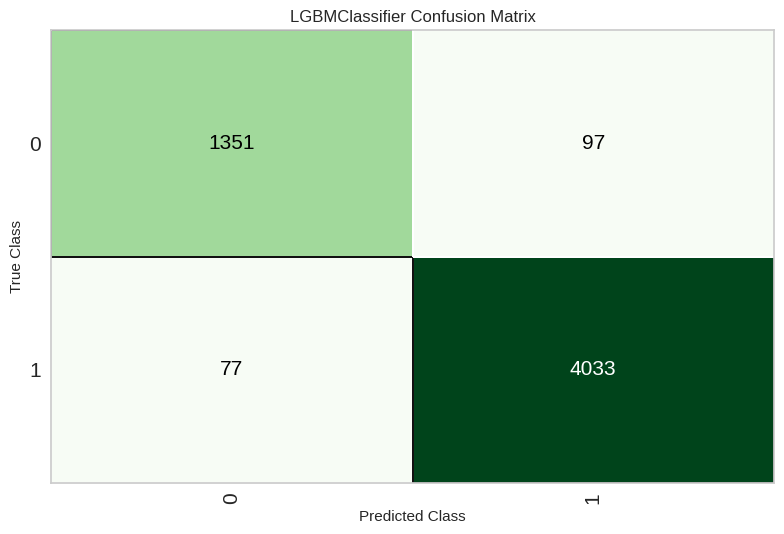

In [ ]:
plot_model(best, plot = 'confusion_matrix')

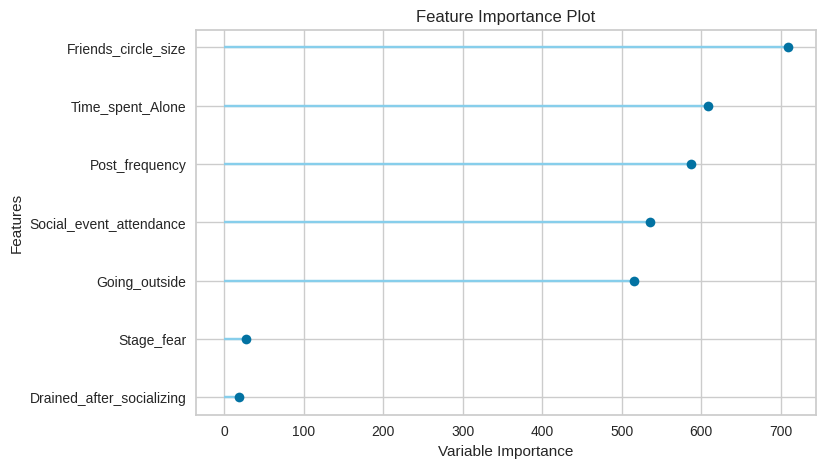

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
lg = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9684,0.9664,0.9823,0.9752,0.9787,0.9174,0.9175
1,0.9645,0.9606,0.9812,0.9711,0.9761,0.9071,0.9073
2,0.9668,0.9646,0.9760,0.9791,0.9775,0.9142,0.9142
3,0.9661,0.9746,0.9750,0.9791,0.9770,0.9123,0.9123
4,0.9769,0.9807,0.9885,0.9804,0.9844,0.9395,0.9396
5,0.9730,0.9766,0.9823,0.9812,0.9818,0.9299,0.9299
6,0.9653,0.9726,0.9718,0.9811,0.9764,0.9105,0.9107
7,0.9738,0.9656,0.9854,0.9793,0.9823,0.9314,0.9315
8,0.9637,0.9635,0.9750,0.9760,0.9755,0.9059,0.9059


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of lightgbm
tuned_lg = tune_model(lg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9692,0.9654,0.9844,0.9742,0.9793,0.9192,0.9194
1,0.9638,0.9602,0.9812,0.9701,0.9756,0.9050,0.9052
2,0.9676,0.9630,0.9771,0.9791,0.9781,0.9161,0.9161
3,0.9684,0.9786,0.9771,0.9801,0.9786,0.9182,0.9182
4,0.9761,0.9792,0.9885,0.9793,0.9839,0.9374,0.9376
5,0.9730,0.9770,0.9823,0.9812,0.9818,0.9299,0.9299
6,0.9645,0.9717,0.9718,0.9800,0.9759,0.9085,0.9086
7,0.9738,0.9685,0.9854,0.9793,0.9823,0.9314,0.9315
8,0.9637,0.9653,0.9760,0.9750,0.9755,0.9057,0.9057


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# ensemble with bagging
ensemble_model(lg, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9676,0.9675,0.9833,0.9732,0.9782,0.9152,0.9153
1,0.9645,0.9626,0.9812,0.9711,0.9761,0.9071,0.9073
2,0.9676,0.9679,0.9771,0.9791,0.9781,0.9161,0.9161
3,0.9668,0.9748,0.9760,0.9791,0.9775,0.9142,0.9142
4,0.9769,0.9821,0.9885,0.9804,0.9844,0.9395,0.9396
5,0.9730,0.9773,0.9823,0.9812,0.9818,0.9299,0.9299
6,0.9637,0.9711,0.9708,0.9800,0.9754,0.9066,0.9067
7,0.9738,0.9665,0.9854,0.9793,0.9823,0.9314,0.9315
8,0.9637,0.9648,0.9760,0.9750,0.9755,0.9057,0.9057


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=LGBMClassifier(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=123,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           subsample=1.0,
                                           subsample_for_bin=200000,
                                           subsample_freq=0),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
ensemble_model(lg, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9653,0.9650,0.9812,0.9721,0.9766,0.9092,0.9093
1,0.9568,0.9606,0.9750,0.9669,0.9709,0.8871,0.8872
2,0.9622,0.9644,0.9729,0.9759,0.9744,0.9022,0.9023
3,0.9614,0.9706,0.9771,0.9710,0.9740,0.8994,0.8995
4,0.9776,0.9793,0.9885,0.9814,0.9849,0.9416,0.9417
5,0.9653,0.9761,0.9812,0.9721,0.9766,0.9092,0.9093
6,0.9614,0.9723,0.9698,0.9779,0.9738,0.9005,0.9006
7,0.9722,0.9625,0.9844,0.9782,0.9813,0.9274,0.9275
8,0.9560,0.9604,0.9708,0.9698,0.9703,0.8856,0.8856


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=123, reg_alpha=0.0,
                                            reg_lambda=0.0, subsample=1.0,
                                            subsample_for_bin=200000,
                                            subsample_freq=0),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [ ]:
top5 = compare_models(sort = 'F1', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9690,0.9704,0.9805,0.9777,0.9791,0.9193,0.9194,1.9420
lr,Logistic Regression,0.9688,0.9622,0.9807,0.9773,0.9790,0.9189,0.9190,0.1610
ridge,Ridge Classifier,0.9687,0.9623,0.9807,0.9771,0.9789,0.9184,0.9185,0.0780
ada,Ada Boost Classifier,0.9687,0.9702,0.9807,0.9771,0.9789,0.9184,0.9185,0.3220
lda,Linear Discriminant Analysis,0.9687,0.9624,0.9807,0.9771,0.9789,0.9184,0.9185,0.0800
svm,SVM - Linear Kernel,0.9686,0.9586,0.9809,0.9768,0.9788,0.9182,0.9183,0.1250
knn,K Neighbors Classifier,0.9682,0.9594,0.9803,0.9768,0.9786,0.9173,0.9174,0.3100
nb,Naive Bayes,0.9683,0.9593,0.9797,0.9775,0.9786,0.9176,0.9177,0.1320
gbc,Gradient Boosting Classifier,0.9683,0.9724,0.9804,0.9768,0.9786,0.9175,0.9176,0.8610
xgboost,Extreme Gradient Boosting,0.9682,0.9701,0.9805,0.9766,0.9786,0.9172,0.9174,0.2680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
blend=blend_models(top5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9684,0.0000,0.9833,0.9742,0.9787,0.9173,0.9174
1,0.9622,0.0000,0.9802,0.9691,0.9746,0.9009,0.9011
2,0.9676,0.0000,0.9771,0.9791,0.9781,0.9161,0.9161
3,0.9684,0.0000,0.9771,0.9801,0.9786,0.9182,0.9182
4,0.9753,0.0000,0.9864,0.9803,0.9834,0.9356,0.9357
5,0.9722,0.0000,0.9812,0.9812,0.9812,0.9280,0.9280
6,0.9637,0.0000,0.9718,0.9790,0.9754,0.9064,0.9065
7,0.9745,0.0000,0.9864,0.9793,0.9829,0.9334,0.9335
8,0.9637,0.0000,0.9760,0.9750,0.9755,0.9057,0.9057


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

**pake 2 variabel**


In [ ]:
train1.columns

Index(['Unnamed: 0', 'Time_spent_Alone', 'Stage_fear',
       'Social_event_attendance', 'Going_outside', 'Drained_after_socializing',
       'Friends_circle_size', 'Post_frequency', 'Personality'],
      dtype='object')

In [ ]:
train1=pd.read_csv('imputed_df.csv')
train1=train1[['Time_spent_Alone', 'Friends_circle_size', 'Personality']]

In [ ]:
from pycaret.classification import *

target_map = {'Introvert': 0, 'Extrovert': 1}

train1['Personality'] = train1['Personality'].map(target_map)


s = setup(train1, target = 'Personality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Personality
2,Target type,Binary
3,Original data shape,"(18524, 3)"
4,Transformed data shape,"(18524, 3)"
5,Transformed train set shape,"(12966, 3)"
6,Transformed test set shape,"(5558, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9641,0.9659,0.9761,0.9753,0.9757,0.9066,0.9067,1.0170
knn,K Neighbors Classifier,0.9634,0.9580,0.9764,0.9741,0.9753,0.9047,0.9048,0.1020
gbc,Gradient Boosting Classifier,0.9634,0.9668,0.9758,0.9747,0.9752,0.9048,0.9049,0.3970
xgboost,Extreme Gradient Boosting,0.9630,0.9646,0.9760,0.9740,0.9750,0.9037,0.9038,0.1070
rf,Random Forest Classifier,0.9627,0.9646,0.9755,0.9742,0.9748,0.9032,0.9033,0.6670
dt,Decision Tree Classifier,0.9624,0.9542,0.9752,0.9741,0.9746,0.9024,0.9025,0.0310
ada,Ada Boost Classifier,0.9621,0.9649,0.9739,0.9749,0.9744,0.9018,0.9019,0.2170
et,Extra Trees Classifier,0.9621,0.9622,0.9753,0.9735,0.9744,0.9013,0.9014,0.5300
qda,Quadratic Discriminant Analysis,0.9601,0.9566,0.9783,0.9681,0.9732,0.8955,0.8958,0.0290
nb,Naive Bayes,0.9600,0.9570,0.9780,0.9682,0.9731,0.8951,0.8954,0.0300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Test

In [ ]:
!curl -O https://raw.githubusercontent.com/netrialiarahmi/Predict-the-Introverts-from-the-Extroverts/main/test.csv

test = pd.read_csv('test.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  190k  100  190k    0     0   412k      0 --:--:-- --:--:-- --:--:--  414k


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def impute_numerical_data_with_lightgbm(df, column_to_impute, categorical_columns):
    # Ensure the column to impute is not in the categorical columns list passed to the function
    if column_to_impute in categorical_columns:
         print(f"Warning: Column '{column_to_impute}' found in specified categorical columns list. Excluding it from features.")
         categorical_columns = [col for col in categorical_columns if col != column_to_impute]


    df_with_missing = df[df[column_to_impute].isna()].copy()
    df_without_missing = df[~df[column_to_impute].isna()].copy()

    # Features for the model: all other columns except the one being imputed
    X = df_without_missing.drop(columns=[column_to_impute])
    y = df_without_missing[column_to_impute]

    # Convert categorical features to 'category' dtype for LightGBM
    current_categorical_features = [col for col in categorical_columns if col in X.columns]
    for col in current_categorical_features:
        X[col] = X[col].astype('category')
    for col in current_categorical_features: # Apply to the missing part as well
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype('category')

    # Ensure numerical columns are included and are not of 'category' dtype
    current_numerical_features = [col for col in numerical_columns if col != column_to_impute and col in X.columns]
    for col in current_numerical_features:
         if col in X.columns:
            X[col] = X[col].astype(float) # Ensure numerical dtype
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype(float) # Ensure numerical dtype


    # Split data for evaluation (optional but good practice)
    if not df_without_missing.empty: # Only split if there's data to train on
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        model = lgb.LGBMRegressor(
            n_estimators=100,
            learning_rate=0.1,
            num_leaves=31,
            random_state=0,
            verbose=-1 # Suppress verbose output
        )
        # Ensure categorical features passed to model.fit are present in X_train
        categorical_feature_indices = [X_train.columns.get_loc(c) for c in current_categorical_features if c in X_train.columns]
        model.fit(X_train, y_train, categorical_feature=categorical_feature_indices)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
    else:
        # If no data to train, cannot evaluate MAE
        model = None
        mae = None
        print(f"Warning: No non-missing data available for column '{column_to_impute}' to train imputation model.")


    if model is not None and not df_with_missing.empty:
        imputed_values = model.predict(df_with_missing.drop(columns=[column_to_impute]))
        # Impute based on the original DataFrame index
        df.loc[df_with_missing.index, column_to_impute] = imputed_values
    elif not df_with_missing.empty:
         print(f"Warning: Could not impute missing values for '{column_to_impute}' due to lack of training data.")


    return df, mae


# Define the numerical and categorical columns based on your dataset (excluding target for test data)
numerical_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
# 'Personality' is not in the test data, so it's not a feature for imputing other columns in test
categorical_columns = ['Stage_fear', 'Drained_after_socializing']

# Drop the 'id' column from the test data
test_df = test.drop('id', axis=1).copy()

# Only numerical columns can be imputed using this function
numerical_columns_to_impute = [
    'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
    'Friends_circle_size', 'Post_frequency'
]

imputation_results_test = {}
current_test_df = test_df.copy() # Work on a copy

for column in numerical_columns_to_impute:
    if column in current_test_df.columns:
        # Ensure categorical_columns passed to the function are relevant to the current imputation
        current_cat_cols = [col for col in categorical_columns if col != column] # Exclude the column being imputed
        current_test_df, mae = impute_numerical_data_with_lightgbm(current_test_df, column, current_cat_cols)
        imputation_results_test[column] = mae
    else:
        print(f"The numerical column '{column}' was not found in the test DataFrame.")
        imputation_results_test[column] = None

print("MAE for each imputed numerical column in test data:")
print(imputation_results_test)

# Display the head of the DataFrame with imputed numerical values
print("\nTest DataFrame head after numerical imputation:")
display(current_test_df.head())

# Verify missing values after numerical imputation
print("\nMissing values in test data after numerical imputation:")
print(current_test_df.isna().sum())

MAE for each imputed numerical column in test data:
{'Time_spent_Alone': 1.3859237559040087, 'Social_event_attendance': 1.5207401878427411, 'Going_outside': 1.1355588196883635, 'Friends_circle_size': 2.372937962087156, 'Post_frequency': 1.6583843798234743}

Test DataFrame head after numerical imputation:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.000000,No,7.0,4.0,No,6.0,6.708782
1,7.566391,Yes,0.0,0.0,Yes,5.0,1.000000
2,3.000000,No,5.0,6.0,No,15.0,9.000000
3,3.000000,No,4.0,4.0,No,5.0,6.000000
4,9.000000,Yes,1.0,2.0,Yes,1.0,1.000000



Missing values in test data after numerical imputation:
Time_spent_Alone               0
Stage_fear                   598
Social_event_attendance        0
Going_outside                  0
Drained_after_socializing    432
Friends_circle_size            0
Post_frequency                 0
dtype: int64


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

def impute_categorical_data_with_lightgbm(df, column_to_impute, numerical_columns, categorical_columns):
    # The column to impute should be in the categorical columns list passed to the function
    if column_to_impute not in categorical_columns:
        print(f"Error: Column '{column_to_impute}' is not in the specified categorical columns list.")
        return df, None # Return original df and no f1 score

    df_with_missing = df[df[column_to_impute].isna()].copy()
    df_without_missing = df[~df[column_to_impute].isna()].copy()

    # Features for the model: all other columns except the one being imputed
    X = df_without_missing.drop(columns=[column_to_impute])
    y = df_without_missing[column_to_impute]

    # Convert categorical features to 'category' dtype for LightGBM
    current_categorical_features = [col for col in categorical_columns if col != column_to_impute and col in X.columns]
    for col in current_categorical_features:
        X[col] = X[col].astype('category')
    for col in current_categorical_features: # Apply to the missing part as well
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype('category')

    # Ensure numerical columns are included and are not of 'category' dtype
    current_numerical_features = [col for col in numerical_columns if col in X.columns]
    for col in current_numerical_features:
         if col in X.columns:
            X[col] = X[col].astype(float) # Ensure numerical dtype
         if col in df_with_missing.columns:
            df_with_missing[col] = df_with_missing[col].astype(float) # Ensure numerical dtype


    # Split data for evaluation (optional but good practice)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        num_leaves=31,
        random_state=0,
        class_weight='balanced', # Useful for imbalanced classes
        verbose=-1 # Suppress verbose output
    )

    # Identify categorical feature indices for LightGBM
    categorical_feature_indices = [X_train.columns.get_loc(c) for c in current_categorical_features if c in X_train.columns]


    model.fit(X_train, y_train,
              categorical_feature=categorical_feature_indices,
              )

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Use average='macro' for f1_score with multiple classes, or 'binary' for 2 classes
    # Assuming it's a binary classification problem for the missing values
    f1_metric = f1_score(y_test, y_pred, average='binary' if len(y.unique()) == 2 else 'macro', pos_label='Yes' if len(y.unique()) == 2 else None)


    # Predict missing values
    imputed_values = model.predict(df_with_missing.drop(columns=[column_to_impute]))

    # Impute based on the original DataFrame index
    df.loc[df_with_missing.index, column_to_impute] = imputed_values

    return df, f1_metric

# Define the numerical and categorical columns based on your dataset
numerical_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
# 'Personality' is not in the test data, so it's not a feature for imputing other columns in test
categorical_columns = ['Stage_fear', 'Drained_after_socializing']

# Identify categorical columns with missing values in the test data
categorical_columns_to_impute_test = [col for col in categorical_columns if current_test_df[col].isna().any()]

imputation_results_cat_test = {}
# Use the DataFrame after numerical imputation for test data
current_test_df_imputed_cat = current_test_df.copy()

for column in categorical_columns_to_impute_test:
    if column in current_test_df_imputed_cat.columns:
        # Pass the full categorical_columns list (excluding 'Personality') to the function
        current_test_df_imputed_cat, f1_metric = impute_categorical_data_with_lightgbm(
            current_test_df_imputed_cat,
            column,
            numerical_columns,
            categorical_columns # Pass the list of categorical features in test data
        )
        imputation_results_cat_test[column] = f1_metric
    else:
        print(f"The categorical column '{column}' was not found in the test DataFrame.")
        imputation_results_cat_test[column] = None

print("F1 Score for each imputed categorical column in test data:")
print(imputation_results_cat_test)

# Display the head of the DataFrame after categorical imputation
print("\nTest DataFrame head after categorical imputation:")
display(current_test_df_imputed_cat.head())

# Verify if missing values are imputed
print("\nMissing values in test data after categorical imputation:")
print(current_test_df_imputed_cat.isna().sum())

F1 Score for each imputed categorical column in test data:
{'Stage_fear': 1.0, 'Drained_after_socializing': 0.9928825622775801}

Test DataFrame head after categorical imputation:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.000000,No,7.0,4.0,No,6.0,6.708782
1,7.566391,Yes,0.0,0.0,Yes,5.0,1.000000
2,3.000000,No,5.0,6.0,No,15.0,9.000000
3,3.000000,No,4.0,4.0,No,5.0,6.000000
4,9.000000,Yes,1.0,2.0,Yes,1.0,1.000000



Missing values in test data after categorical imputation:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [ ]:
new_test=current_test_df_imputed_cat.copy()

In [ ]:
predictions = predict_model(best, data = new_test)

In [ ]:
predictions.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,prediction_label,prediction_score
0,3.000000,No,7.0,4.0,No,6.0,6.708782,1,0.9899
1,7.566391,Yes,0.0,0.0,Yes,5.0,1.000000,0,0.9919
2,3.000000,No,5.0,6.0,No,15.0,9.000000,1,0.9526
3,3.000000,No,4.0,4.0,No,5.0,6.000000,1,0.9918
4,9.000000,Yes,1.0,2.0,Yes,1.0,1.000000,0,0.9816


In [ ]:
predictions1 = predict_model(blend, data = new_test)

In [ ]:
predictions2 = predict_model(best1, data = new_test)

In [ ]:
!curl -O https://raw.githubusercontent.com/netrialiarahmi/Predict-the-Introverts-from-the-Extroverts/main/sample_submission.csv

submit=pd.read_csv('sample_submission.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98815  100 98815    0     0   368k      0 --:--:-- --:--:-- --:--:--  369k


In [ ]:
# Define the reverse mapping
reverse_target_map = {0: 'Introvert', 1: 'Extrovert'}

# Map the numerical prediction labels back to string labels
submit['Personality'] = predictions2['prediction_label'].map(reverse_target_map)

In [ ]:
submit.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [ ]:
submit.to_csv('submission3.csv', index=False)

In [ ]:
data=pd.read_csv('submission1.csv')
data2=pd.read_csv('submission2.csv')

# Merge the two dataframes on 'id' to easily compare predictions
comparison_df = pd.merge(data, data2, on='id', suffixes=('_sub1', '_sub2'))

# Find rows where the 'Personality' predictions are different
different_predictions = comparison_df[comparison_df['Personality_sub1'] != comparison_df['Personality_sub2']]

if different_predictions.empty:
    print("Tidak ada perbedaan dalam prediksi Personality antara submission1.csv dan submission2.csv")
else:
    print("Ditemukan perbedaan dalam prediksi Personality antara submission1.csv dan submission2.csv:")
    display(different_predictions)

Ditemukan perbedaan dalam prediksi Personality antara submission1.csv dan submission2.csv:


,id,Personality_sub1,Personality_sub2
958,19482,Introvert,Extrovert
1088,19612,Introvert,Extrovert
1328,19852,Introvert,Extrovert
1493,20017,Extrovert,Introvert
2017,20541,Introvert,Extrovert
2396,20920,Introvert,Extrovert
2410,20934,Extrovert,Introvert
2614,21138,Extrovert,Introvert
3191,21715,Introvert,Extrovert
4143,22667,Extrovert,Introvert


# Task
Perform hard voting on the predictions from "submission1.csv", "submission2.csv", and "submission3.csv" and save the result to a new CSV file.

## Load submission files

### Subtask:
Load `submission1.csv`, `submission2.csv`, and `submission3.csv` into pandas DataFrames.


**Reasoning**:
Load the three submission CSV files into pandas DataFrames as instructed.



In [ ]:
submission1_df = pd.read_csv('submission1.csv')
submission2_df = pd.read_csv('submission2.csv')
submission3_df = pd.read_csv('submission3.csv')

print("submission1_df head:")
display(submission1_df.head())

print("\nsubmission2_df head:")
display(submission2_df.head())

print("\nsubmission3_df head:")
display(submission3_df.head())

submission1_df head:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert



submission2_df head:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert



submission3_df head:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## Merge submissions

### Subtask:
Merge the three DataFrames based on the 'id' column.


**Reasoning**:
Merge the three submission dataframes based on the 'id' column, renaming the personality columns to reflect their origin.



In [ ]:
merged_submissions = pd.merge(submission1_df, submission2_df, on='id', suffixes=('_sub1', '_sub2'))
merged_submissions = pd.merge(merged_submissions, submission3_df, on='id')
merged_submissions = merged_submissions.rename(columns={'Personality': 'Personality_sub3'})
display(merged_submissions.head())

,id,Personality_sub1,Personality_sub2,Personality_sub3
0,18524,Extrovert,Extrovert,Extrovert
1,18525,Introvert,Introvert,Introvert
2,18526,Extrovert,Extrovert,Extrovert
3,18527,Extrovert,Extrovert,Extrovert
4,18528,Introvert,Introvert,Introvert


## Perform hard voting

### Subtask:
For each 'id', determine the majority predicted 'Personality' label across the three submissions.


**Reasoning**:
Define a function to perform hard voting and apply it to the merged DataFrame to get the majority prediction for each row.



In [ ]:
def get_majority_prediction(row):
    predictions = [row['Personality_sub1'], row['Personality_sub2'], row['Personality_sub3']]
    # Count occurrences of each prediction
    counts = pd.Series(predictions).value_counts()
    # Get the label with the highest count
    # If there's a tie, idxmax() returns the first one, which is fine for this case.
    majority_prediction = counts.idxmax()
    return majority_prediction

merged_submissions['hard_voting_prediction'] = merged_submissions.apply(get_majority_prediction, axis=1)

display(merged_submissions.head())

,id,Personality_sub1,Personality_sub2,Personality_sub3,hard_voting_prediction
0,18524,Extrovert,Extrovert,Extrovert,Extrovert
1,18525,Introvert,Introvert,Introvert,Introvert
2,18526,Extrovert,Extrovert,Extrovert,Extrovert
3,18527,Extrovert,Extrovert,Extrovert,Extrovert
4,18528,Introvert,Introvert,Introvert,Introvert


## Create new submission file

### Subtask:
Create a new DataFrame with 'id' and the hard voting predictions, and save it to a new CSV file.


**Reasoning**:
Create the final submission DataFrame and save it to a CSV file.



In [ ]:
final_submission = merged_submissions[['id', 'hard_voting_prediction']].copy()
final_submission = final_submission.rename(columns={'hard_voting_prediction': 'Personality'})
final_submission.to_csv('hard_voting_submission.csv', index=False)

print("Final submission DataFrame head:")
display(final_submission.head())

Final submission DataFrame head:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## Summary:

### Data Analysis Key Findings

*   The analysis successfully loaded and merged three submission files based on the 'id' column.
*   A hard voting mechanism was implemented to determine the majority 'Personality' prediction for each 'id' across the three submissions.
*   A new submission file, 'hard\_voting\_submission.csv', was created containing the 'id' and the final hard voting 'Personality' predictions.

### Insights or Next Steps

*   The hard voting process provides a combined prediction based on the consensus of three individual models, which can potentially improve robustness compared to a single model's prediction.
*   Further analysis could involve comparing the performance of the hard voting submission against the individual submissions to evaluate its effectiveness.
